In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['text.usetex'] = True

In [2]:
# Expected ULs Using b-only model  with PDF = S*mu*fac*S_pdf + B*b_pdf (sample of 100K events)
# fac = 2*lum*CS_ee_BB*Br_tag*eff_signal_tag


# Expected ULs Using b-only model to 50/ab ::::: Dtag
'''dataMMin2_D_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [],
        'sigmaPlus2': [],
        'sigmaMinus1': [],
        'sigmaPlus1': [],
        'Median': [],
        'Limit': [],
        'eff': [0.95883,]}

dataMMax2_D_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [3.16414e-07, 3.78423e-07, 1.81913e-07, 1.61643e-07, 1.47464e-07, 9.38505e-08],
        'sigmaPlus2': [1.31019e-06, 1.39411e-06, 6.34642e-07, 5.44713e-07, 5.28634e-07, 3.84302e-07],
        'sigmaMinus1': [4.52447e-07, 5.08524e-07, 2.35938e-07, 2.09758e-07, 1.96989e-07, 1.30357e-07],
        'sigmaPlus1': [9.45997e-07, 1.02126e-06, 4.67961e-07, 4.02428e-07, 3.86015e-07, 2.74197e-07],
        'Median': [6.54782e-07, 7.22259e-07, 3.25624e-07, 2.87647e-07, 2.74118e-07, 1.88185e-07],
        'Limit': [1.3849e-06, 8.54698e-07, 3.11693e-07, 3.02046e-07, 1.76615e-07, 1.34839e-07],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}'''
# 
dataXps_D_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [4.69299e-07, 4.96447e-07, 2.42203e-07,1.94958e-07, 1.81359e-07, 7.96203e-08],
        'sigmaPlus2': [1.65221e-06, 1.72478e-06, 8.25141e-07, 6.77628e-07, 6.50326e-07, 3.8522e-07],
        'sigmaMinus1': [6.2571e-07, 6.67091e-07, 3.07036e-07, 2.64941e-07, 2.42288e-07, 1.17833e-07],
        'sigmaPlus1': [1.22188e-06, 1.28514e-06, 6.0655e-07, 4.9558e-07, 4.76831e-07, 2.68599e-07],
        'Median': [8.76641e-07, 9.17924e-07, 4.3726e-07, 3.60382e-07, 3.41438e-07, 1.78549e-07],
        'Limit': [6.26624e-07, 7.37526e-07, 3.72914e-07, 3.40667e-07, 2.34029e-07, 2.0133e-07],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}

#*********************************************************************
# Expected ULs Using b-only model to 50/ab ::::: DstarGammatag
'''dataMMin2_DstarGamma_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [],
        'sigmaPlus2': [],
        'sigmaMinus1': [],
        'sigmaPlus1': [],
        'Median': [],
        'Limit': [],
        'eff': [0.95883,]}

dataMMax2_DstarGamma_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [],
        'sigmaPlus2': [],
        'sigmaMinus1': [],
        'sigmaPlus1': [],
        'Median': [],
        'Limit': [],
        'eff': []}'''

dataXps_DstarGamma_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [9.91089e-08, 1.02897e-07, 5.09911e-08, 3.9909e-08, 3.92942e-08, 2.26048e-08],
        'sigmaPlus2': [3.53186e-07, 3.64643e-07, 1.80554e-07, 1.48693e-07, 1.4716e-07, 1.03522e-07],
        'sigmaMinus1': [1.33865e-07, 1.38993e-07, 6.64473e-08, 5.55791e-08, 5.31055e-08, 3.17293e-08],
        'sigmaPlus1': [2.60896e-07, 2.70167e-07, 1.31894e-07, 1.07896e-07, 1.06122e-07, 7.13447e-08],
        'Median': [1.8569e-07, 1.93539e-07, 9.34312e-08, 7.65385e-08, 7.44027e-08, 4.74078e-08],
        'Limit': [1.15048e-07, 1.29784e-07, 1.10222e-07, 9.48168e-08, 7.46674e-08, 3.04151e-08],
        'eff': [0.33735, 0.34191, 0.34164, 0.34282, 0.31974, 0.26038]}

#*********************************************************************
# Expected ULs Using b-only model to 50/ab ::::: DstarGammatag
'''dataMMin2_DstarPi0_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [],
        'sigmaPlus2': [],
        'sigmaMinus1': [],
        'sigmaPlus1': [],
        'Median': [],
        'Limit': [],
        'eff': [0.95883,]}

dataMMax2_DstarPi0_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [],
        'sigmaPlus2': [],
        'sigmaMinus1': [],
        'sigmaPlus1': [],
        'Median': [],
        'Limit': [],
        'eff': []}'''

dataXps_DstarPi0_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [6.47667e-08, 6.97159e-08, 3.57506e-08, 2.56239e-08, 2.41801e-08, 1.21798e-08],
        'sigmaPlus2': [2.29105e-07, 2.38089e-07, 1.14673e-07, 9.16357e-08, 8.68755e-08, 5.87961e-08],
        'sigmaMinus1': [8.75772e-08, 9.26299e-08, 4.26031e-08, 3.44518e-08, 3.23097e-08, 1.82085e-08],
        'sigmaPlus1': [1.70212e-07, 1.77261e-07, 8.27168e-08, 6.73409e-08, 6.36469e-08, 4.08498e-08],
        'Median': [1.20982e-07, 1.27147e-07, 5.96281e-08, 4.78451e-08, 4.55534e-08, 2.73402e-08],
        'Limit': [8.1717e-08, 8.18508e-08, 5.57978e-08, 1.00831e-07, 3.76883e-08, 3.2245e-08],
        'eff': [0.61492, 0.62269, 0.62426, 0.6211, 0.57715, 0.47099]}

In [3]:
# Expected ULs Using b-only model  with PDF = S*mu*fac*S_pdf + B*b_pdf (sample of 100K events)
# Pdf combined for 3 tags
# S_pdf = N1*S1_pdf + N2*S2_pdf + N3*S3_pdf
# fac = 2*lum*CS_ee_BB*[Br_tagD*eff_signal_D+Br_tagDstarGamma*eff_signal_DstarGamma+Br_tagDstarPi0*eff_signal_DstarPi0]
# N_bins = 200
dataXps_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [2.47441e-07, 2.72575e-07, 1.47545e-07, 1.15931e-07, 9.7543e-08, 5.02023e-08],
        'sigmaPlus2': [8.72434e-07, 9.54992e-07, 5.28727e-07, 4.1742e-07, 3.54833e-07, 1.93211e-07],
        'sigmaMinus1': [3.33056e-07, 3.66306e-07, 1.9973e-07, 1.56239e-07, 1.31661e-07, 6.83023e-08],
        'sigmaPlus1': [6.4784e-07, 7.10242e-07, 3.90168e-07, 3.07389e-07, 2.60261e-07, 1.3898e-07],
        'Median': [4.6388e-07, 5.09256e-07, 2.78533e-07, 2.18551e-07, 1.84522e-07, 9.67992e-08],
        'Limit': [4.11e-07, 7.12498e-07, 3.83394e-07, 2.16243e-07, 9.72941e-08, 7.78423e-08],
        'mu': [1.31651e-15, 2.83293e-07, 1.09305e-07, 1.22186e-08, 8.05648e-08, 1.41098e-13],
        'sigma':[2.17425e-07, 2.54142e-07, 1.37937e-07, 4.63653e-07, 9.04348e-08, 1.54279e-07],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}


# N_bins = 50
dataq2_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [2.42039e-07, 2.61829e-07, 1.36948e-07, 1.07544e-07, 9.12154e-08, 6.68404e-08],
        'sigmaPlus2': [8.52124e-07, 9.18151e-07, 4.86695e-07, 3.87403e-07, 3.32048e-07, 2.5119e-07],
        'sigmaMinus1': [3.2526e-07, 3.51835e-07, 1.83703e-07, 1.44855e-07, 1.232e-07, 9.09394e-08],
        'sigmaPlus1': [6.32716e-07, 6.82588e-07, 3.59597e-07, 2.85051e-07, 2.43487e-07, 1.82373e-07],
        'Median': [4.52927e-07, 4.89172e-07, 2.56407e-07, 2.02755e-07, 1.72479e-07, 1.27986e-07],
        'Limit': [3.49774e-07, 3.12287e-07, 2.08147e-07, 1.78257e-07, 2.06655e-07, 9.34295e-08],
        'mu': [7.54771e-08, 1.12056e-07, -1.46195e-08, -1.23438e-08, 3.91686e-08, -6.60987e-08],
        'sigma':[2.26317e-07, 2.44003e-07, 1.25332e-07, 9.79367e-08, 8.18975e-08, 3.58989e-08],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}

# N_bins = 50
dataXps_50_Had = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [6.93705e-07, 4.19181e-07, 2.9246e-07, 2.6343e-07, 2.44271e-07, 1.95959e-07],
        'sigmaPlus2': [2.7142e-06, 1.76049e-06, 1.2712e-06, 1.16978e-06, 1.09293e-06, 9.28551e-07],
        'sigmaMinus1': [9.48028e-07, 5.78086e-07, 4.05601e-07, 3.66572e-07, 3.39975e-07, 2.75233e-07],
        'sigmaPlus1': [1.9473e-06, 1.23231e-06, 8.79084e-07, 8.03165e-07, 7.48147e-07, 6.24001e-07],
        'Median': [1.35158e-06, 8.3737e-07, 5.91388e-07, 5.36869e-07, 4.99016e-07, 4.09196e-07],
        'Limit': [1.26295e-06, 8.55865e-07, 7.33065e-07, 5.35497e-07, 4.90013e-07, 3.35862e-07],
        'mu': [-5.58286e-07, -2.41843e-07, 2.26095e-07, 1.57292e-07, -3.67464e-08, -1.11792e-07],
        'sigma':[5.22336e-07, 3.55917e-07, 2.7342e-07, 2.19581e-07, 1.93366e-07, 1.41445e-07],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}


# N_bins = 50
dataq2_50_Had = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [9.71047e-07, 1.03808e-06, 5.36233e-07, 4.31436e-07, 3.65793e-07, 2.54145e-07],
        'sigmaPlus2': [3.56021e-06, 3.77042e-06, 2.10143e-06, 1.73085e-06, 1.50773e-06, 1.12611e-06],
        'sigmaMinus1': [1.3129e-06, 1.40172e-06, 7.32145e-07, 5.90773e-07, 5.02727e-07, 3.52993e-07],
        'sigmaPlus1': [2.60535e-06, 2.76747e-06, 1.50287e-06, 1.22758e-06, 1.05987e-06, 7.72767e-07],
        'Median': [1.84311e-06, 1.96325e-06, 1.04225e-06, 8.4496e-07, 7.24128e-07, 5.16493e-07],
        'Limit': [1.66456e-06, 1.88836e-06, 8.75251e-07, 1.28646e-06, 6.74139e-07, 5.21567e-07],
        'mu': [2.32738e-16, 4.33681e-18, 1.54321e-19, 1.98399e-07, 1.06776e-18, 1.14344e-07],
        'sigma':[3.84992e-06, 3.12872e-06, 3.73235e-07, 4.00926e-07, 3.93533e-07, 2.23483e-07],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}


'''
dataMmin_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [3.17947e-07, 2.64797e-07, 1.28682e-07, 1.0852e-07, 1.00642e-07, 5.6686e-08],
        'sigmaPlus2': [1.12863e-06, 9.41371e-07, 4.63787e-07, 3.91971e-07, 3.67828e-07, 2.16695e-07],
        'sigmaMinus1': [4.28642e-07, 3.56103e-07, 1.73872e-07, 1.46183e-07, 1.36559e-07, 7.70666e-08],
        'sigmaPlus1': [8.37387e-07, 6.96142e-07, 3.41458e-07, 2.87789e-07, 2.69879e-07, 1.56355e-07],
        'Median': [5.98026e-07, 4.96656e-07, 2.43002e-07, 2.04459e-07, 1.91215e-07, 1.09299e-07],
        'Limit': [7.33902e-07, 6.04753e-07, 2.86483e-07, 2.59201e-07, 4.14221e-07, 1.41857e-07],
        'eff': [0.33735, 0.34191, 0.34164, 0.34282, 0.31974, 0.26038]}

dataMmax_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [3.10793e-07, 3.08716e-07, 1.28821e-07, 1.05523e-07, 9.78737e-08, 6.2381e-08],
        'sigmaPlus2': [1.09832e-06, 1.08391e-06, 4.63563e-07, 3.81859e-07, 3.56952e-07, 2.36099e-07],
        'sigmaMinus1': [4.18449e-07, 4.15726e-07, 1.74001e-07, 1.41891e-07, 1.32179e-07, 8.4609e-08],
        'sigmaPlus1': [8.14696e-07, 8.05917e-07, 3.41467e-07, 2.80588e-07, 2.61312e-07, 1.7075e-07],
        'Median': [5.82853e-07, 5.77828e-07, 2.43106e-07, 1.99071e-07, 1.85223e-07, 1.19711e-07],
        'Limit': [8.79866e-07, 1.03195e-06, 2.90621e-07, 9.74778e-08, 1.72375e-07, 1.09842e-07],
        'eff': [0.61492, 0.62269, 0.62426, 0.6211, 0.57715, 0.47099]}'''


"\ndataMmin_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],\n        'sigmaMinus2': [3.17947e-07, 2.64797e-07, 1.28682e-07, 1.0852e-07, 1.00642e-07, 5.6686e-08],\n        'sigmaPlus2': [1.12863e-06, 9.41371e-07, 4.63787e-07, 3.91971e-07, 3.67828e-07, 2.16695e-07],\n        'sigmaMinus1': [4.28642e-07, 3.56103e-07, 1.73872e-07, 1.46183e-07, 1.36559e-07, 7.70666e-08],\n        'sigmaPlus1': [8.37387e-07, 6.96142e-07, 3.41458e-07, 2.87789e-07, 2.69879e-07, 1.56355e-07],\n        'Median': [5.98026e-07, 4.96656e-07, 2.43002e-07, 2.04459e-07, 1.91215e-07, 1.09299e-07],\n        'Limit': [7.33902e-07, 6.04753e-07, 2.86483e-07, 2.59201e-07, 4.14221e-07, 1.41857e-07],\n        'eff': [0.33735, 0.34191, 0.34164, 0.34282, 0.31974, 0.26038]}\n\ndataMmax_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],\n        'sigmaMinus2': [3.10793e-07, 3.08716e-07, 1.28821e-07, 1.05523e-07, 9.78737e-08, 6.2381e-08],\n        'sigmaPlus2': [1.09832e-06, 1.08391e-06, 4.63563e-07, 3.81859e-07, 3.56952e-07, 2.36099e-07],\n

In [4]:
# ULs without redicing 40% the noise 
# N_bins = 200
dataXps_50_NoRed = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [3.09978e-07, 3.22371e-07, 1.4755e-07, 1.1855e-07, 1.11389e-07, 6.19906e-08],
        'sigmaPlus2': [1.09237e-06, 1.12933e-06, 5.2947e-07, 4.26413e-07, 4.03746e-07, 2.34102e-07],
        'sigmaMinus1': [4.17331e-07, 4.33332e-07, 1.99154e-07, 59671e-07, 1.50326e-07, 8.41226e-08],
        'sigmaPlus1': [8.11694e-07, 8.40094e-07, 3.90487e-07, 3.14125e-07, 2.9671e-07, 1.69532e-07],
        'Median': [5.81168e-07, 6.02364e-07, 2.78232e-07, 2.23456e-07, 2.10599e-07, 1.18791e-07],
        'Limit': [1.04295e-06, 8.75502e-07, 4.00664e-07, 1.61513e-07, 2.67289e-07, 1.49528e-07],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}


# N_bins = 50
dataq2_50_NoRed = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [3.04507e-07, 3.07342e-07, 1.35384e-07, 1.0961e-07, 1.04596e-07, 8.26703e-08],
        'sigmaPlus2': [1.06881e-06, 1.07779e-06, 4.84334e-07, 3.95277e-07, 3.78529e-07, 3.05474e-07],
        'sigmaMinus1': [4.09463e-07, 4.13004e-07, 1.82566e-07, 1.47911e-07, 1.41161e-07, 1.11738e-07],
        'sigmaPlus1': [7.94474e-07, 8.01367e-07, 3.57185e-07, 2.90986e-07, 2.78178e-07, 2.22799e-07],
        'Median': [5.69336e-07, 5.74345e-07, 2.54352e-07, 2.06724e-07, 1.97427e-07, 1.57263e-07],
        'Limit': [6.42546e-07, 6.63649e-07, 2.41641e-07, 3.49332e-07, 2.90054e-07, 2.02166e-07],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}

# N_bins = 50
dataXps_50_Had_NoRed = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [8.95384e-07, 4.58027e-07, 2.92569e-07, 2.43907e-07, 2.55964e-07, 2.8088e-07],
        'sigmaPlus2': [3.39709e-06, 1.91522e-06, 1.27594e-06, 1.11196e-06, 1.13497e-06, 1.21526e-06],
        'sigmaMinus1': [1.21794e-06, 6.32448e-07, 4.06245e-07, 3.41085e-07, 3.56276e-07, 3.89231e-07],
        'sigmaPlus1': [2.46065e-06, 1.34263e-06, 8.81739e-07, 7.57525e-07, 7.79309e-07, 8.41112e-07],
        'Median': [1.72348e-06, 9.13827e-07, 5.92681e-07, 5.02623e-07, 5.2134e-07, 5.66718e-07],
        'Limit': [2.21272e-06, 9.41133e-07, 5.59982e-07, 6.28397e-07, 4.24164e-07, 5.17922e-07],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}


# N_bins = 50
dataq2_50_Had_NoRed = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [1.22428e-06, 1.22026e-06, 5.35231e-07, 4.35144e-07, 4.24837e-07, 3.10169e-07],
        'sigmaPlus2': [4.445e-06, 4.42528e-06, 2.10582e-06, 1.75147e-06, 1.71077e-06, 1.32833e-06],
        'sigmaMinus1': [1.6539e-06, 1.6475e-06, 7.31601e-07, 5.96946e-07, 5.82115e-07, 4.28439e-07],
        'sigmaPlus1': [3.26605e-06, 3.25113e-06, 1.50458e-06, 1.24145e-06, 1.21202e-06, 9.22398e-07],
        'Median': [2.31727e-06, 2.30747e-06, 1.04246e-06, 8.5501e-07, 8.33738e-07, 6.22972e-07],
        'Limit': [3.0921e-06, 2.20721e-06, 8.89834e-07, 1.31701e-06, 1.37997e-06, 6.37931e-07],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}

In [5]:
# Expected ULs Using b-only model  with PDF = S*mu*fac*S_pdf + B*b_pdf (sample of 100K events)
# Pdf combined for 3 tags
# S_pdf = N1*S1_pdf + N2*S2_pdf + N3*S3_pdf
# fac = 2*lum*CS_ee_BB*[Br_tagD*eff_signal_D+Br_tagDstarGamma*eff_signal_DstarGamma+Br_tagDstarPi0*eff_signal_DstarPi0]
# N_bins = 30
dataXps_362 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [3.09491e-06, 3.3763e-06, 2.01419e-06, 1.62144e-06, 1.47578e-06, 1.1576e-06],
        'sigmaPlus2': [1.25797e-05, 1.33338e-05, 9.34346e-06, 7.93104e-06, 7.66074e-06, 6.79976e-06],
        'sigmaMinus1': [4.24361e-06, 4.60545e-06, 2.82546e-06, 2.29617e-06, 2.11442e-06, 1.6896e-06],
        'sigmaPlus1': [8.87158e-06, 9.48084e-06, 6.33447e-06, 5.28968e-06, 5.02777e-06, 4.29562e-06],
        'Median': [6.08649e-06, 6.55979e-06, 4.18099e-06, 3.43826e-06, 3.21362e-06, 2.64577e-06],
        'Limit': [4.87153e-06, 5.91269e-06, 2.69534e-06, 3.73278e-06, 2.58758e-06, 3.28827e-06],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}

# N_bins = 20
dataq2_362 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [3.04632e-06, 3.25178e-06, 1.90357e-06, 1.52223e-06, 1.44446e-06, 1.26526e-06],
        'sigmaPlus2': [1.24364e-05, 1.3009e-05, 8.91937e-06, 7.48944e-06, 7.50932e-06, 7.1336e-06],
        'sigmaMinus1': [4.18129e-06, 4.44466e-06, 2.67579e-06, 2.15124e-06, 2.06343e-06, 1.83207e-06],
        'sigmaPlus1': [8.75983e-06, 9.21467e-06, 6.02512e-06, 4.9722e-06, 4.92071e-06, 4.55595e-06],
        'Median': [6.00336e-06, 6.35157e-06, 3.96605e-06, 3.22493e-06, 3.14048e-06, 2.83951e-06],
        'Limit': [1.10456e-05, 9.2563e-06, 4.73462e-06, 1.66723e-06, 2.23277e-06, 3.16569e-06],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}

# For Hadronic tag using 362/fb was necesary not apply the reduction of 40% in K0L and neutrons
# N_bins = 5

dataXps_362_Had_NoRed = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [1.87992e-05, 1.88312e-05, 1.97037e-05, 1.14043e-05, 4.31865e-06, 1.54653e-05],
        'sigmaPlus2': [9.69443e-05, 9.70299e-05, 0.000100172, 1.71701e-05, 6.15477e-05, 8.03689e-05],
        'sigmaMinus1': [2.65907e-05, 2.66355e-05, 2.78271e-05, 4.72061e-05, 8.43335e-06, 2.11078e-05],
        'sigmaPlus1': [6.29852e-05, 6.30645e-05, 6.54268e-05, 2.79137e-05, 3.38612e-05, 5.06303e-05],
        'Median': [4.017e-05, 4.02306e-05, 4.19111e-05, 2.79137e-05, 1.70757e-05, 3.16492e-05],
        'Limit': [7.0926e-05, 7.0359e-05, 7.01827e-05, 2.11626e-05, 1.69508e-05, 2.31412e-05],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}

dataq2_362_Had_NoRed = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [2.02811e-05, 2.02386e-05, 4.27643e-05, 1.38733e-05, 1.4104e-05, 1.5217e-05],
        'sigmaPlus2': [0.000100365, 0.000100117, 0.000100943, 8.34775e-05, 8.47479e-05, 8.69237e-05],
        'sigmaMinus1': [2.84332e-05, 2.83724e-05, 2.86147e-05, 2.03216e-05, 2.06211e-05, 2.201e-05],
        'sigmaPlus1': [6.58591e-05, 6.57035e-05, 6.62603e-05, 5.23064e-05, 5.31049e-05, 5.51355e-05],
        'Median': [4.24813e-05, 4.2381e-05, 4.27643e-05, 3.19739e-05, 3.24714e-05, 3.4172e-05],
        'Limit': [4.38737e-05, 4.35576e-05, 4.35468e-05, 2.29075e-05, 2.3316e-05, 4.59804e-05],
        'eff': [0.95883, 0.96735, 0.96784, 0.96164, 0.91141, 0.88424]}


'''dataMmin_362 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [3.7929e-06, 3.64259e-06, 1.85462e-06, 1.61777e-06, 1.52869e-06, 1.63621e-06],
        'sigmaPlus2': [1.48067e-05, 1.45696e-05, 8.64999e-06, 7.71819e-06, 7.70106e-06, 8.2607e-06],
        'sigmaMinus1': [5.1693e-06, 4.98783e-06, 2.59992e-06, 2.27513e-06, 2.17113e-06, 2.32484e-06],
        'sigmaPlus1': [1.05846e-05, 1.03482e-05, 5.84234e-06, 5.17573e-06, 5.08566e-06, 5.44767e-06],
        'Median': [7.34961e-06, 7.1351e-06, 3.84936e-06, 3.38722e-06, 3.27619e-06, 3.50684e-06],
        'Limit': [1.61372e-05, 1.44476e-05, 3.35123e-06, 2.10517e-06, 3.04028e-06, 2.25849e-06],
        'eff': [0.33735, 0.34191, 0.34164, 0.34282, 0.31974, 0.26038]}

dataMmax_362 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [3.7727e-06, 3.8895e-06, 1.88908e-06, 1.45268e-06, 1.41478e-06, 1.54194e-06],
        'sigmaPlus2': [1.48363e-05, 1.49463e-05, 8.66537e-06, 7.31792e-06, 7.28635e-06, 7.89317e-06],
        'sigmaMinus1': [5.15146e-06, 5.28745e-06, 2.64217e-06, 2.06603e-06, 2.017e-06, 2.19527e-06],
        'sigmaPlus1': [1.05907e-05, 1.07315e-05, 5.88691e-06, 4.83934e-06, 4.77856e-06, 5.1836e-06],
        'Median': [7.3393e-06, 7.48696e-06, 3.89824e-06, 3.11836e-06, 3.05803e-06, 3.32293e-06],
        'Limit': [1.24192e-05, 1.09304e-05, 2.96105e-06, 2.06908e-06, 3.31062e-06, 2.69191e-06],
        'eff': [0.61492, 0.62269, 0.62426, 0.6211, 0.57715, 0.47099]}'''


"dataMmin_362 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],\n        'sigmaMinus2': [3.7929e-06, 3.64259e-06, 1.85462e-06, 1.61777e-06, 1.52869e-06, 1.63621e-06],\n        'sigmaPlus2': [1.48067e-05, 1.45696e-05, 8.64999e-06, 7.71819e-06, 7.70106e-06, 8.2607e-06],\n        'sigmaMinus1': [5.1693e-06, 4.98783e-06, 2.59992e-06, 2.27513e-06, 2.17113e-06, 2.32484e-06],\n        'sigmaPlus1': [1.05846e-05, 1.03482e-05, 5.84234e-06, 5.17573e-06, 5.08566e-06, 5.44767e-06],\n        'Median': [7.34961e-06, 7.1351e-06, 3.84936e-06, 3.38722e-06, 3.27619e-06, 3.50684e-06],\n        'Limit': [1.61372e-05, 1.44476e-05, 3.35123e-06, 2.10517e-06, 3.04028e-06, 2.25849e-06],\n        'eff': [0.33735, 0.34191, 0.34164, 0.34282, 0.31974, 0.26038]}\n\ndataMmax_362 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],\n        'sigmaMinus2': [3.7727e-06, 3.8895e-06, 1.88908e-06, 1.45268e-06, 1.41478e-06, 1.54194e-06],\n        'sigmaPlus2': [1.48363e-05, 1.49463e-05, 8.66537e-06, 7.31792e-06, 7.28635e-06, 7.89317e-06],\n   

In [6]:
#data2D_df = pd.DataFrame(data2D)
#dataMMin2_df = pd.DataFrame(dataMMin2)
#dataMMax2_df = pd.DataFrame(dataMMax2)
dataXps_D_50_df = pd.DataFrame(dataXps_D_50)
dataXps_DstarGamma_50_df = pd.DataFrame(dataXps_DstarGamma_50)
dataXps_DstarPi0_50_df = pd.DataFrame(dataXps_DstarPi0_50)

dataXps_50_df = pd.DataFrame(dataXps_50)
dataq2_50_df = pd.DataFrame(dataq2_50)
dataXps_50_Had_df = pd.DataFrame(dataXps_50_Had)
dataq2_50_Had_df = pd.DataFrame(dataq2_50_Had)

dataXps_362_df = pd.DataFrame(dataXps_362)
dataq2_362_df = pd.DataFrame(dataq2_362)

dataXps_50_NoRed_df = pd.DataFrame(dataXps_50_NoRed)
dataq2_50_NoRed_df = pd.DataFrame(dataq2_50_NoRed)
dataXps_50_NoRed_Had_df = pd.DataFrame(dataXps_50_Had_NoRed)
dataq2_50_NoRed_Had_df = pd.DataFrame(dataq2_50_Had_NoRed)

dataXps_362_Had_NoRed_df = pd.DataFrame(dataXps_362_Had_NoRed)
dataq2_362_Had_NoRed_df = pd.DataFrame(dataq2_362_Had_NoRed)

#dataMmin_404_df = pd.DataFrame(dataMmin_404)
#dataMmax_404_df = pd.DataFrame(dataMmax_404)




In [7]:
# Let's create a new variable Gausian UL at 95% C.L.
def CreateGausUL(df):
    df['GausUL'] = df['mu'] + 1.96 * df['sigma']

    return df

In [8]:
dataXps_50_df = CreateGausUL(dataXps_50_df)
dataq2_50_df = CreateGausUL(dataq2_50_df)
dataXps_50_Had_df = CreateGausUL(dataXps_50_Had_df)
dataq2_50_Had_df = CreateGausUL(dataq2_50_Had_df)

In [49]:
dataXps_50_df

,Mass,sigmaMinus2,sigmaPlus2,sigmaMinus1,sigmaPlus1,Median,Limit,mu,sigma,eff,GausUL
0,0.0,2.474410e-07,8.724340e-07,3.330560e-07,6.478400e-07,4.638800e-07,4.110000e-07,1.316510e-15,2.174250e-07,0.95883,4.261530e-07
1,1.0,2.725750e-07,9.549920e-07,3.663060e-07,7.102420e-07,5.092560e-07,7.124980e-07,2.832930e-07,2.541420e-07,0.96735,7.814113e-07
2,2.0,1.475450e-07,5.287270e-07,1.997300e-07,3.901680e-07,2.785330e-07,3.833940e-07,1.093050e-07,1.379370e-07,0.96784,3.796615e-07
3,3.0,1.159310e-07,4.174200e-07,1.562390e-07,3.073890e-07,2.185510e-07,2.162430e-07,1.221860e-08,4.636530e-07,0.96164,9.209785e-07
4,4.0,9.754300e-08,3.548330e-07,1.316610e-07,2.602610e-07,1.845220e-07,9.729410e-08,8.056480e-08,9.043480e-08,0.91141,2.578170e-07
5,5.0,5.020230e-08,1.932110e-07,6.830230e-08,1.389800e-07,9.679920e-08,7.784230e-08,1.410980e-13,1.542790e-07,0.88424,3.023870e-07


In [50]:
dataq2_50_df

,Mass,sigmaMinus2,sigmaPlus2,sigmaMinus1,sigmaPlus1,Median,Limit,mu,sigma,eff,GausUL
0,0.0,2.420390e-07,8.521240e-07,3.252600e-07,6.327160e-07,4.529270e-07,3.497740e-07,7.547710e-08,2.263170e-07,0.95883,5.190584e-07
1,1.0,2.618290e-07,9.181510e-07,3.518350e-07,6.825880e-07,4.891720e-07,3.122870e-07,1.120560e-07,2.440030e-07,0.96735,5.903019e-07
2,2.0,1.369480e-07,4.866950e-07,1.837030e-07,3.595970e-07,2.564070e-07,2.081470e-07,-1.461950e-08,1.253320e-07,0.96784,2.310312e-07
3,3.0,1.075440e-07,3.874030e-07,1.448550e-07,2.850510e-07,2.027550e-07,1.782570e-07,-1.234380e-08,9.793670e-08,0.96164,1.796121e-07
4,4.0,9.121540e-08,3.320480e-07,1.232000e-07,2.434870e-07,1.724790e-07,2.066550e-07,3.916860e-08,8.189750e-08,0.91141,1.996877e-07
5,5.0,6.684040e-08,2.511900e-07,9.093940e-08,1.823730e-07,1.279860e-07,9.342950e-08,-6.609870e-08,3.589890e-08,0.88424,4.263144e-09


In [51]:
dataXps_50_Had_df

,Mass,sigmaMinus2,sigmaPlus2,sigmaMinus1,sigmaPlus1,Median,Limit,mu,sigma,eff,GausUL
0,0.0,6.937050e-07,2.714200e-06,9.480280e-07,1.947300e-06,1.351580e-06,1.262950e-06,-5.582860e-07,5.223360e-07,0.95883,4.654926e-07
1,1.0,4.191810e-07,1.760490e-06,5.780860e-07,1.232310e-06,8.373700e-07,8.558650e-07,-2.418430e-07,3.559170e-07,0.96735,4.557543e-07
2,2.0,2.924600e-07,1.271200e-06,4.056010e-07,8.790840e-07,5.913880e-07,7.330650e-07,2.260950e-07,2.734200e-07,0.96784,7.619982e-07
3,3.0,2.634300e-07,1.169780e-06,3.665720e-07,8.031650e-07,5.368690e-07,5.354970e-07,1.572920e-07,2.195810e-07,0.96164,5.876708e-07
4,4.0,2.442710e-07,1.092930e-06,3.399750e-07,7.481470e-07,4.990160e-07,4.900130e-07,-3.674640e-08,1.933660e-07,0.91141,3.422510e-07
5,5.0,1.959590e-07,9.285510e-07,2.752330e-07,6.240010e-07,4.091960e-07,3.358620e-07,-1.117920e-07,1.414450e-07,0.88424,1.654402e-07


In [52]:
dataq2_50_Had_df

,Mass,sigmaMinus2,sigmaPlus2,sigmaMinus1,sigmaPlus1,Median,Limit,mu,sigma,eff,GausUL
0,0.0,9.710470e-07,0.000004,1.312900e-06,2.605350e-06,1.843110e-06,1.664560e-06,2.327380e-16,3.849920e-06,0.95883,7.545843e-06
1,1.0,1.038080e-06,0.000004,1.401720e-06,2.767470e-06,1.963250e-06,1.888360e-06,4.336810e-18,3.128720e-06,0.96735,6.132291e-06
2,2.0,5.362330e-07,0.000002,7.321450e-07,1.502870e-06,1.042250e-06,8.752510e-07,1.543210e-19,3.732350e-07,0.96784,7.315406e-07
3,3.0,4.314360e-07,0.000002,5.907730e-07,1.227580e-06,8.449600e-07,1.286460e-06,1.983990e-07,4.009260e-07,0.96164,9.842140e-07
4,4.0,3.657930e-07,0.000002,5.027270e-07,1.059870e-06,7.241280e-07,6.741390e-07,1.067760e-18,3.935330e-07,0.91141,7.713247e-07
5,5.0,2.541450e-07,0.000001,3.529930e-07,7.727670e-07,5.164930e-07,5.215670e-07,1.143440e-07,2.234830e-07,0.88424,5.523707e-07


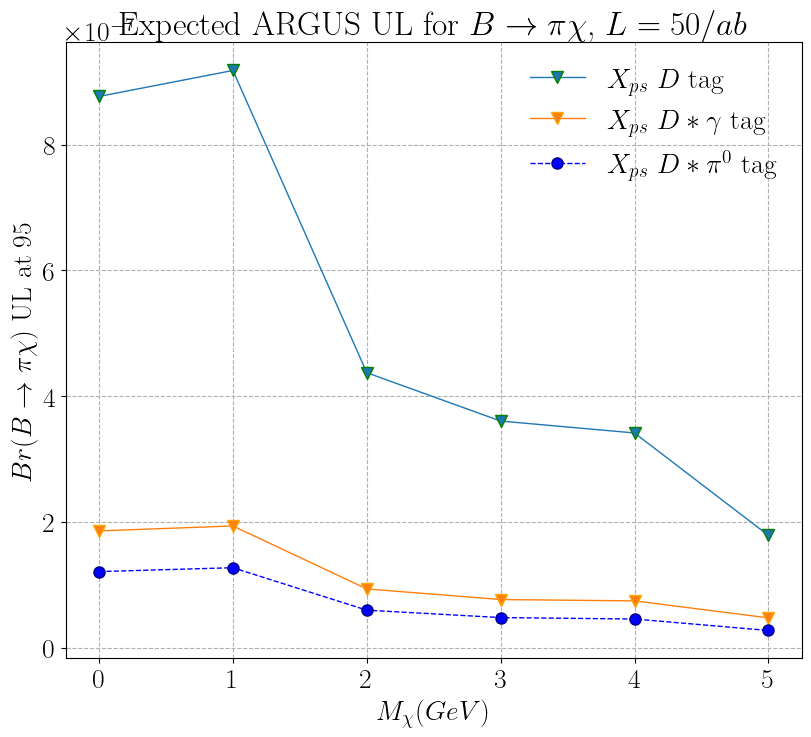

In [13]:
from matplotlib.ticker import ScalarFormatter


#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


plt.rcParams.update({"font.size": 20, "font.family": "serif"})
fig = plt.figure(figsize=(9.5, 8))
ax = fig.add_subplot(111)


ax.plot(dataXps_D_50_df.Mass, dataXps_D_50_df.Median, marker = 'v', lw=1, ms=9, mew=1, mec='g')
ax.plot(dataXps_DstarGamma_50_df.Mass, dataXps_DstarGamma_50_df.Median, marker = 'v', lw=1, ms=9, mew=1, mec='orange')
ax.plot(dataXps_DstarPi0_50_df.Mass, dataXps_DstarPi0_50_df.Median, marker = 'o', c='b', ls='--', lw=1, ms=8, mew=1, mec='navy')
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

plt.title(r'Expected ARGUS UL for $B\to \pi \chi$'+', $L=50/ab$')
ax.legend([r'$X_{ps}$ $D$ tag', r'$X_{ps}$ $D*\gamma$ tag', r'$X_{ps}$ $D*\pi^0$ tag'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)

plt.show()

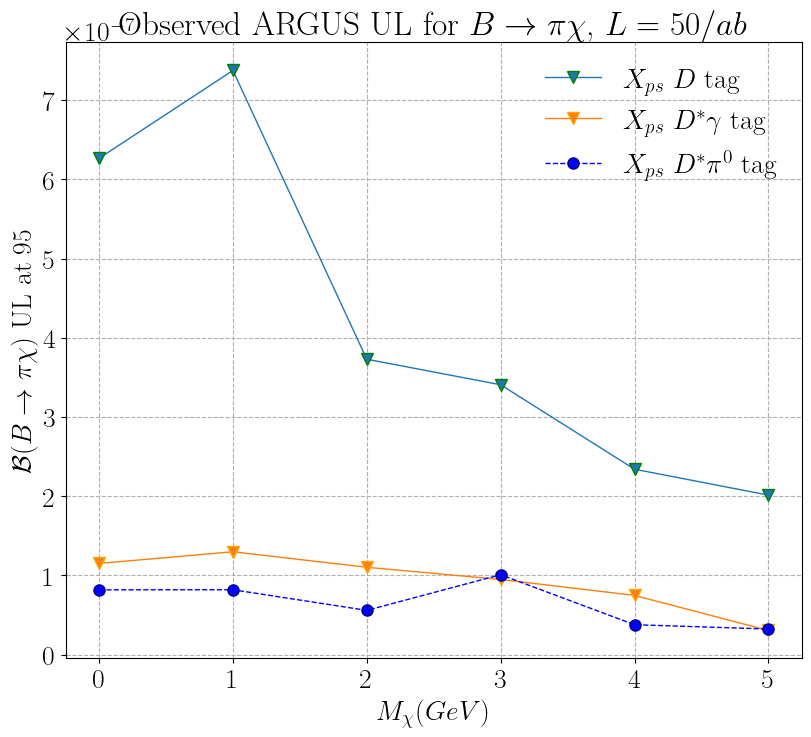

In [14]:
from matplotlib.ticker import ScalarFormatter


#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(9.5, 8))
ax = fig.add_subplot(111)


ax.plot(dataXps_D_50_df.Mass, dataXps_D_50_df.Limit, marker = 'v', lw=1, ms=9, mew=1, mec='g')
ax.plot(dataXps_DstarGamma_50_df.Mass, dataXps_DstarGamma_50_df.Limit, marker = 'v', lw=1, ms=9, mew=1, mec='orange')
ax.plot(dataXps_DstarPi0_50_df.Mass, dataXps_DstarPi0_50_df.Limit, marker = 'o', c='b', ls='--', lw=1, ms=8, mew=1, mec='navy')
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$\mathcal{B}(B\to \pi\chi)$ UL at 95% C.L')

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

plt.title(r'Observed ARGUS UL for $B\to \pi \chi$'+', $L=50/ab$')
ax.legend([r'$X_{ps}$ $D$ tag', r'$X_{ps}$ $D^{*}\gamma$ tag', r'$X_{ps}$ $D^{*}\pi^0$ tag'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)

plt.show()

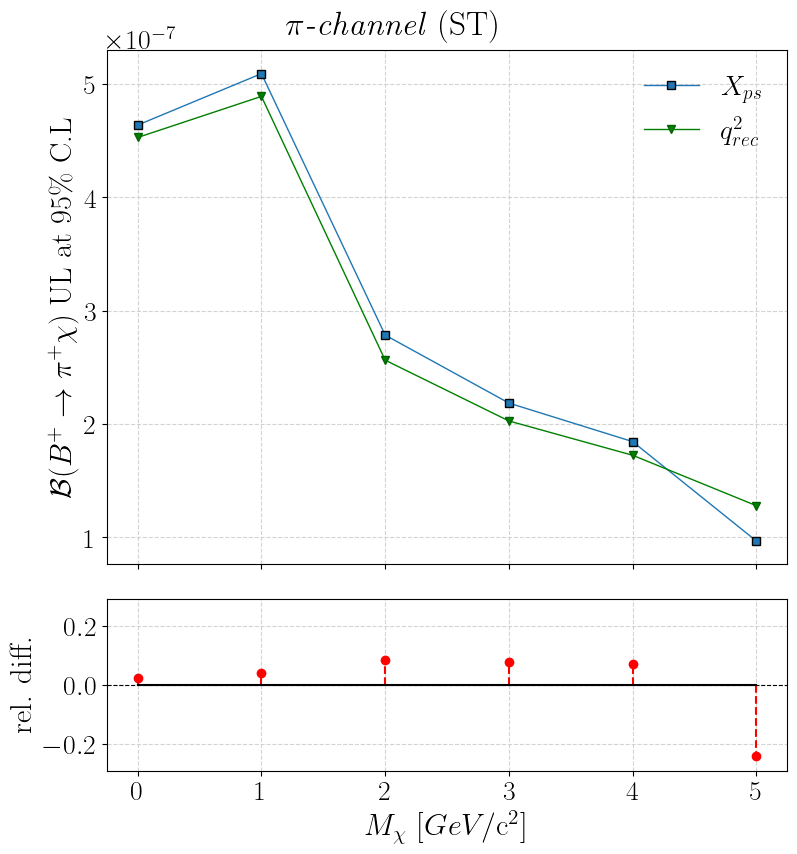

In [15]:
from matplotlib.ticker import ScalarFormatter



#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_50_df.Mass  # X-axis values

# Calculate the difference between the two sets
#difference = (dataXps_50_df.Median - dataq2_50_df.Median)
difference = (dataXps_50_df.Median - dataq2_50_df.Median)/(dataq2_50_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
#fig.subplots_adjust(hspace=0.02)
fig.suptitle(r'$\pi$\textit{-channel} (ST)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_50_df.Mass, dataXps_50_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataq2_50_df.Mass, dataq2_50_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')



ax1.yaxis.set_major_formatter(formatter)


ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to \pi^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=50/ab$)')
ax1.legend([r'$X_{ps} $',  r'$q^2_{rec}$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataXps_50_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.', fontsize=22)
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.2  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
plt.savefig(f'../GetLimit/ULPlots/Pi_SemilepUL.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [16]:
print(difference)

0    0.024183
1    0.041057
2    0.086292
3    0.077907
4    0.069823
5   -0.243674
Name: Median, dtype: float64


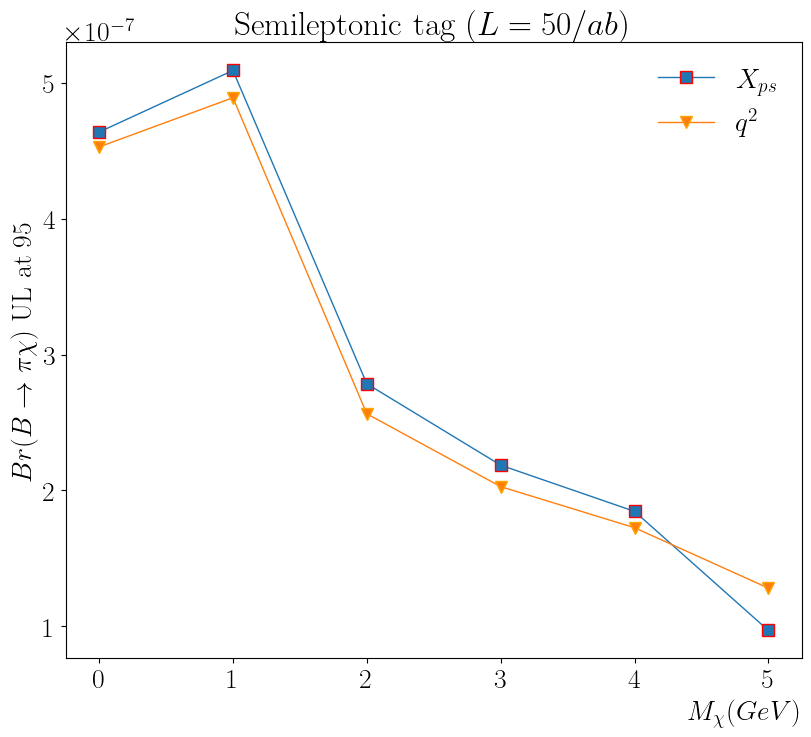

In [17]:
from matplotlib.ticker import ScalarFormatter


#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))



fig = plt.figure(figsize=(9.5, 8))
ax = fig.add_subplot(111)


ax.plot(dataXps_50_df.Mass, dataXps_50_df.Median, marker = 's', lw=1, ms=9, mew=1, mec='r')
ax.plot(dataq2_50_df.Mass, dataq2_50_df.Median, marker = 'v', lw=1, ms=9, mew=1, mec='orange')
#ax.plot(dataMmin_50_df.Mass, dataMmin_50_df.Median, marker = 'o', c='b', ls='--', lw=1, ms=8, mew=1, mec='navy')
#ax.plot(dataMmax_50_df.Mass, dataMmax_50_df.Median, marker = 's', c='r', ls='-', lw=1, ms=8, mew=1, mec='k')
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$', loc ='right')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

plt.title('Semileptonic tag ($L=50/ab$)')
ax.legend([r'$X_{ps} $',  r'$q^2$', r'$M_{min}^2$', r'$M_{max}^2$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)

plt.show()

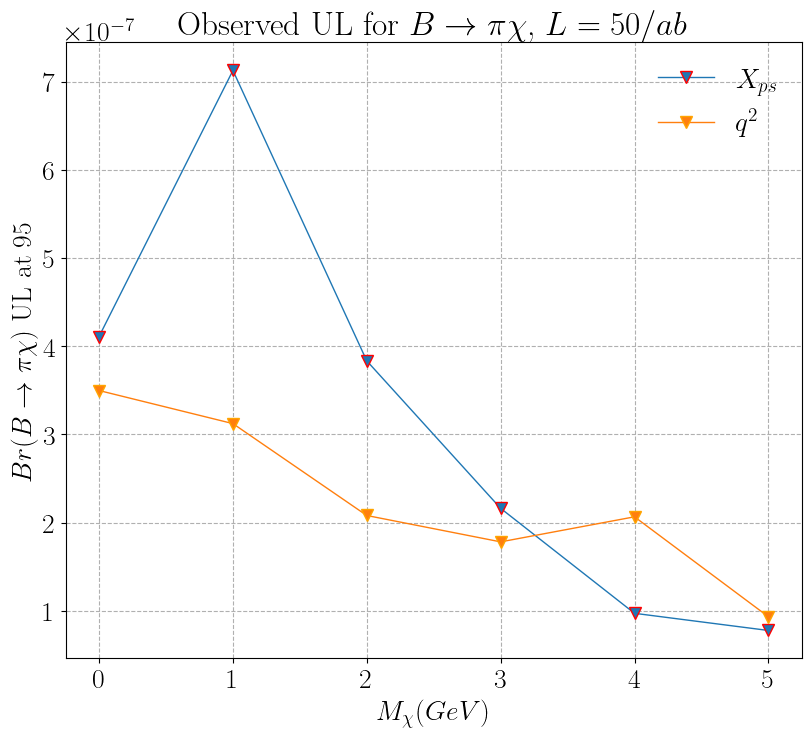

In [18]:
from matplotlib.ticker import ScalarFormatter


#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(9.5, 8))
ax = fig.add_subplot(111)


ax.plot(dataXps_50_df.Mass, dataXps_50_df.Limit, marker = 'v', lw=1, ms=9, mew=1, mec='r')
ax.plot(dataq2_50_df.Mass, dataq2_50_df.Limit, marker = 'v', lw=1, ms=9, mew=1, mec='orange')
#ax.plot(dataMmin_50_df.Mass, dataMmin_50_df.Limit, marker = 'o', c='b', ls='--', lw=1, ms=8, mew=1, mec='navy')
#ax.plot(dataMmax_50_df.Mass, dataMmax_50_df.Limit, marker = 's', c='r', ls='-', lw=1, ms=8, mew=1, mec='k')
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

plt.title(r'Observed UL for $B\to \pi \chi$'+', $L=50/ab$')
ax.legend([r'$X_{ps} $',  r'$q^2$', r'$M_{min}^2$', r'$M_{max}^2$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)

plt.show()

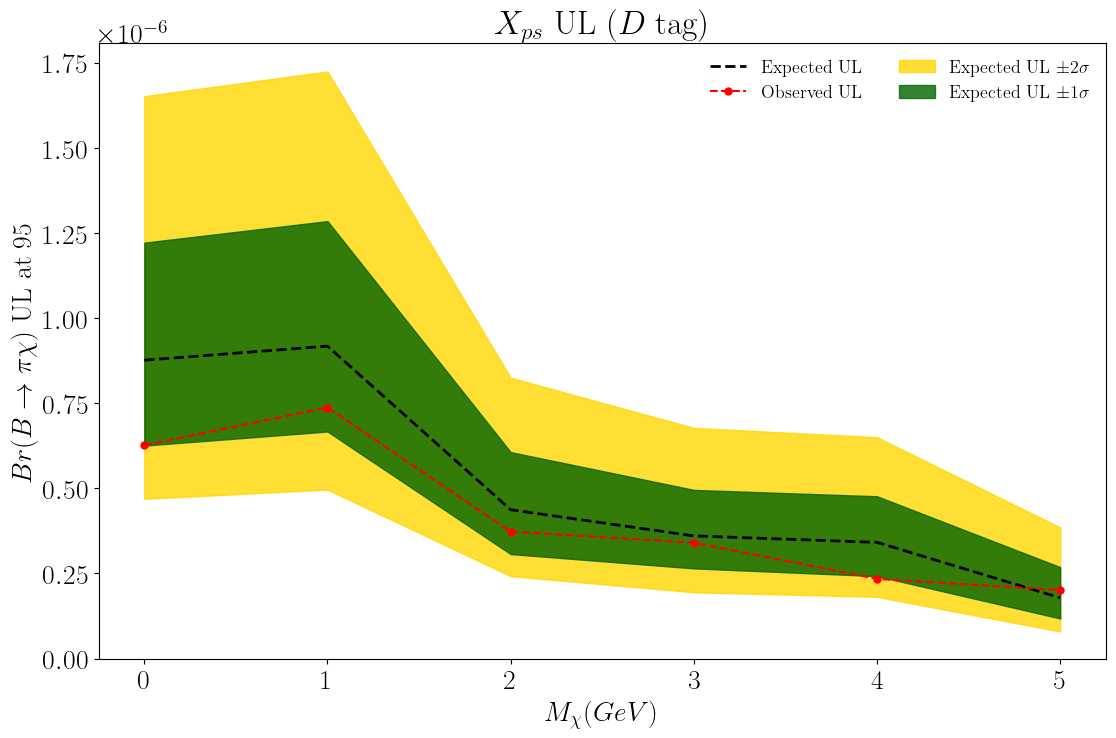

In [19]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataXps_D_50_df.Mass

ax.plot(x, dataXps_D_50_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataXps_D_50_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataXps_D_50_df.sigmaMinus2, dataXps_D_50_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataXps_D_50_df.sigmaMinus1, dataXps_D_50_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(0, 7E-3)

plt.title(r'$X_{ps}$ UL ($D$ tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

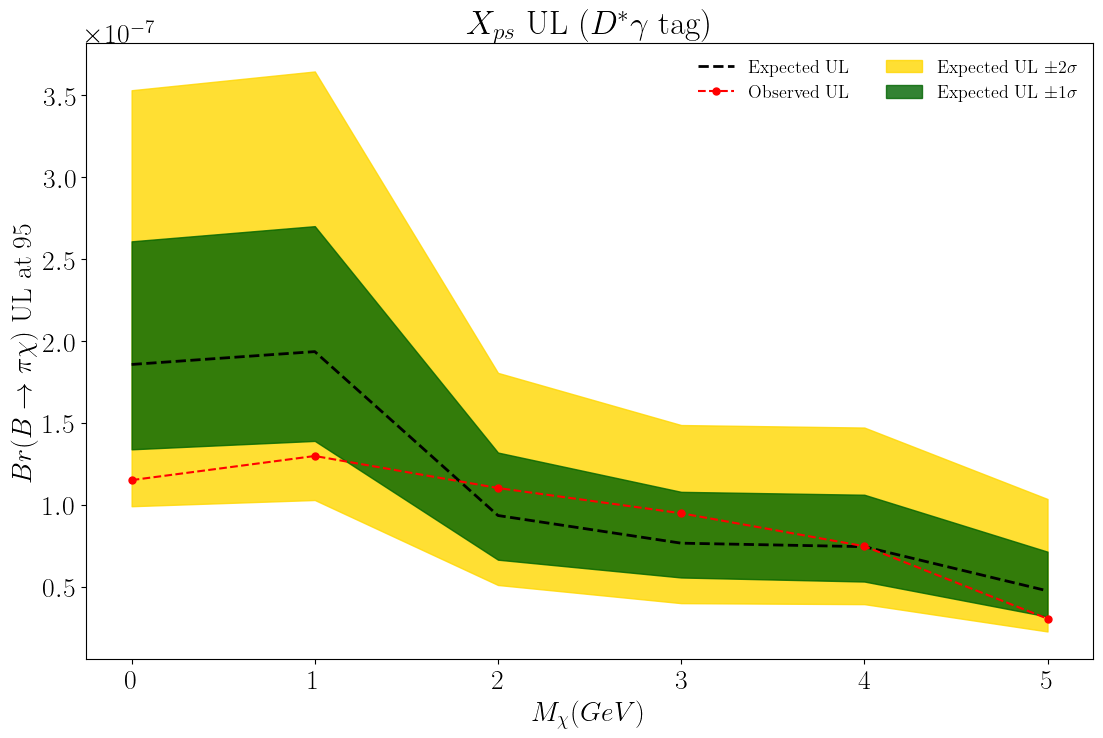

In [20]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataXps_DstarGamma_50_df.Mass

ax.plot(x, dataXps_DstarGamma_50_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataXps_DstarGamma_50_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataXps_DstarGamma_50_df.sigmaMinus2, dataXps_DstarGamma_50_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataXps_DstarGamma_50_df.sigmaMinus1, dataXps_DstarGamma_50_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(0, 7E-3)

plt.title(r'$X_{ps}$ UL ($D^{*}\gamma$ tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

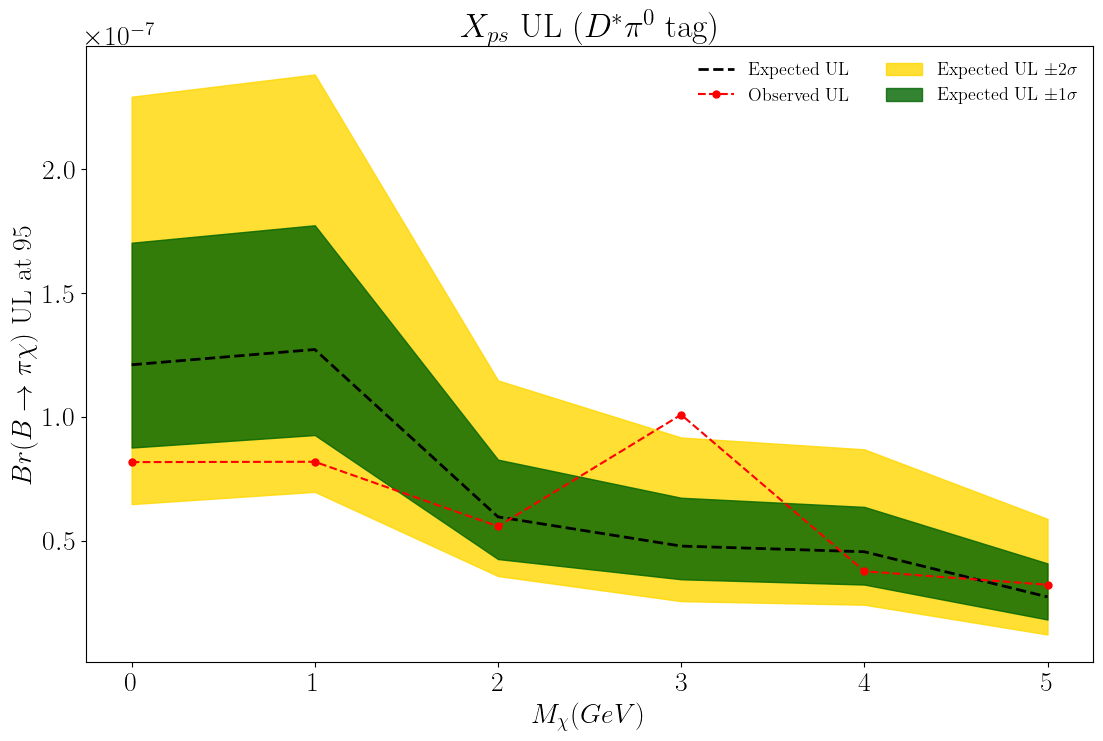

In [21]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataXps_DstarPi0_50_df.Mass

ax.plot(x, dataXps_DstarPi0_50_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataXps_DstarPi0_50_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataXps_DstarPi0_50_df.sigmaMinus2, dataXps_DstarPi0_50_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataXps_DstarPi0_50_df.sigmaMinus1, dataXps_DstarPi0_50_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(0, 7E-3)

plt.title(r'$X_{ps}$ UL ($D^{*}\pi^0$ tag)')
#ax.legend([r'$M_{min}$', r'$M_{max}$', '2D'], frameon=False);
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

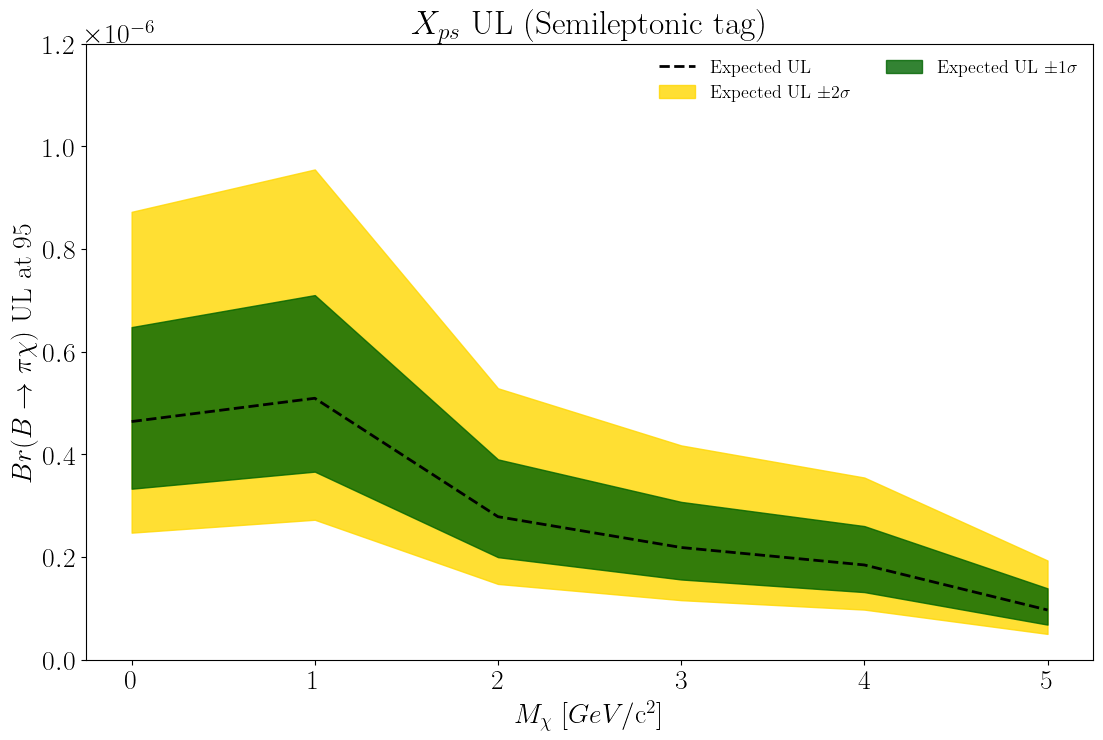

In [22]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataXps_50_df.Mass

ax.plot(x, dataXps_50_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
#ax.plot(x, dataXps_50_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataXps_50_df.sigmaMinus2, dataXps_50_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataXps_50_df.sigmaMinus1, dataXps_50_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 1.2E-6)

plt.title(r'$X_{ps}$ UL (Semileptonic tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

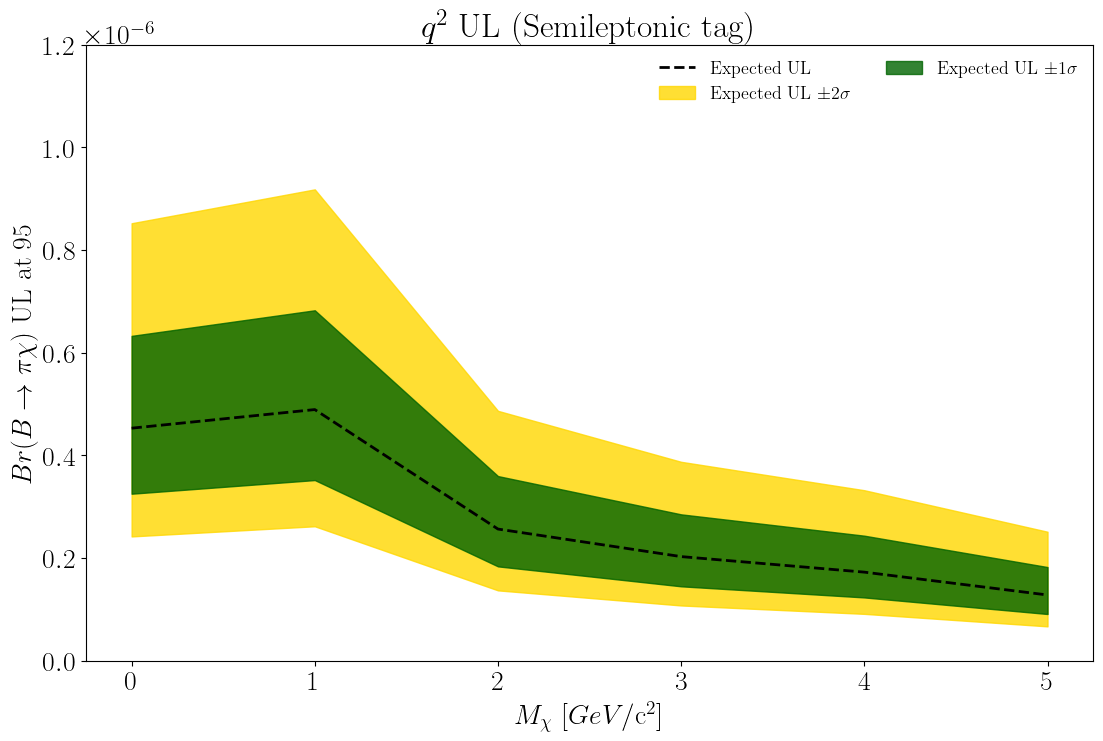

In [23]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataq2_50_df.Mass

ax.plot(x, dataq2_50_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
#ax.plot(x, dataq2_50_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataq2_50_df.sigmaMinus2, dataq2_50_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataq2_50_df.sigmaMinus1, dataq2_50_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 1.2E-6)

plt.title(r'$q^2$ UL (Semileptonic tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

## Hadronic tags

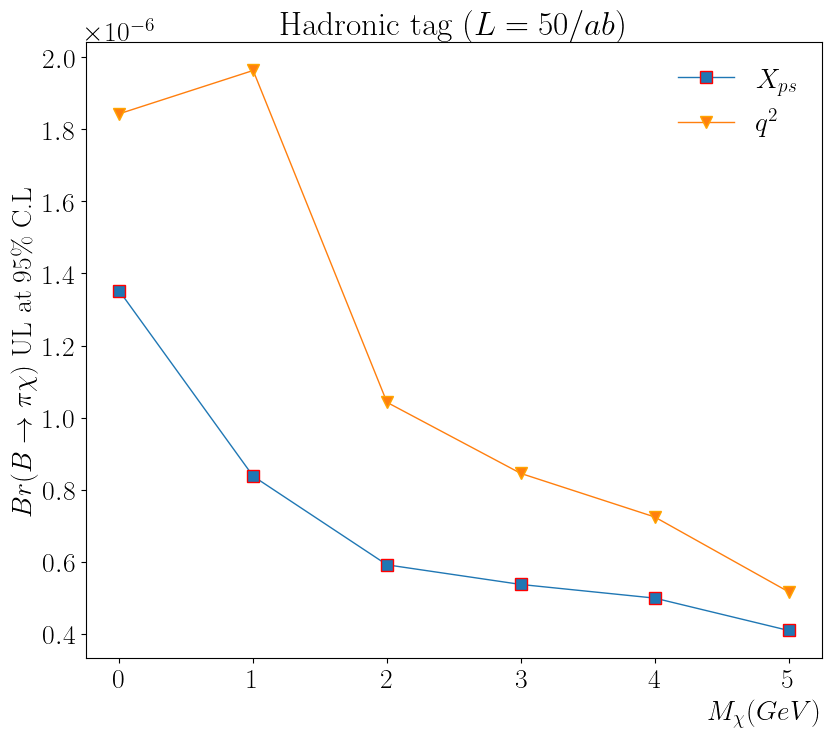

In [24]:
from matplotlib.ticker import ScalarFormatter


#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(9.5, 8))
ax = fig.add_subplot(111)


ax.plot(dataXps_50_Had_df.Mass, dataXps_50_Had_df.Median, marker = 's', lw=1, ms=9, mew=1, mec='r')
ax.plot(dataq2_50_Had_df.Mass, dataq2_50_Had_df.Median, marker = 'v', lw=1, ms=9, mew=1, mec='orange')
#ax.plot(dataMmin_50_df.Mass, dataMmin_50_df.Median, marker = 'o', c='b', ls='--', lw=1, ms=8, mew=1, mec='navy')
#ax.plot(dataMmax_50_df.Mass, dataMmax_50_df.Median, marker = 's', c='r', ls='-', lw=1, ms=8, mew=1, mec='k')
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$', loc= 'right')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95\% C.L')

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

plt.title('Hadronic tag  ($L=50/ab$)')
ax.legend([r'$X_{ps} $',  r'$q^2$', r'$M_{min}^2$', r'$M_{max}^2$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)

plt.show()

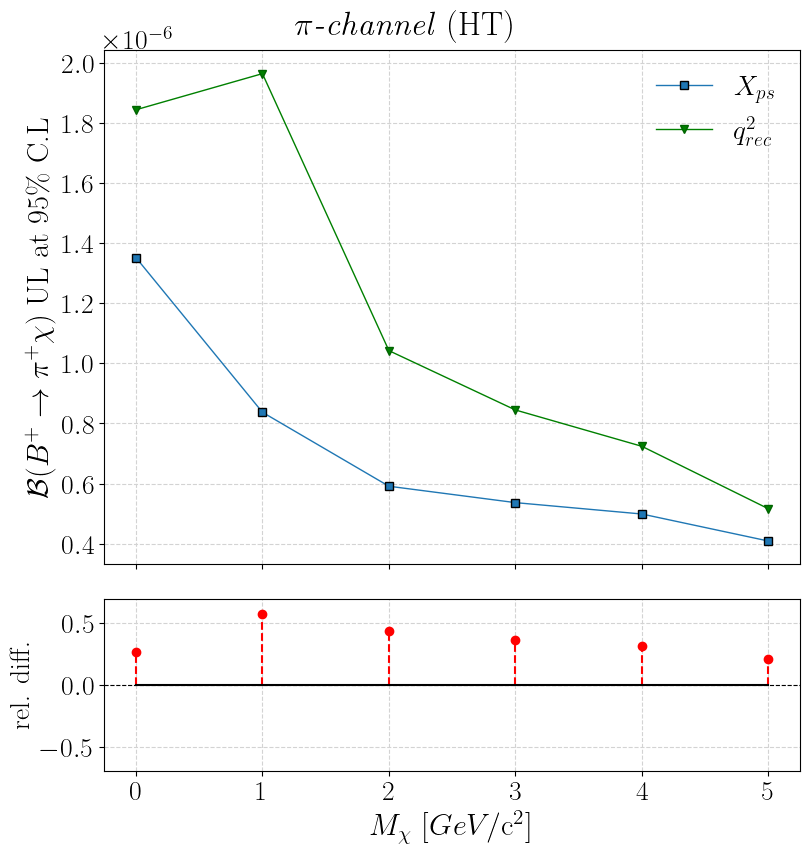

In [25]:
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_50_Had_df.Mass  # X-axis values

# Calculate the difference between the two sets
#differenceHad = (dataq2_50_Had_df.Median - dataXps_50_Had_df.Median)
differenceHad = (dataq2_50_Had_df.Median - dataXps_50_Had_df.Median)/(dataq2_50_Had_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
fig.suptitle(r'$\pi$\textit{-channel}  (HT)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_50_Had_df.Mass, dataXps_50_Had_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataq2_50_Had_df.Mass, dataq2_50_Had_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')




ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to \pi^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=50/ab$)')
ax1.legend([ r'$X_{ps} $', r'$q^2_{rec}$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataXps_50_Had_df.Mass, differenceHad, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(differenceHad)), abs(max(differenceHad))) * 1.2  # Set y-limits based on the maximum absolute difference
#ax2.set_ylim(-0.3, pull_plot_ylim)
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
plt.savefig(f'../GetLimit/ULPlots/Pi_HadronicUL.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [26]:
differenceHad

0    0.266685
1    0.573478
2    0.432585
3    0.364622
4    0.310873
5    0.207741
Name: Median, dtype: float64

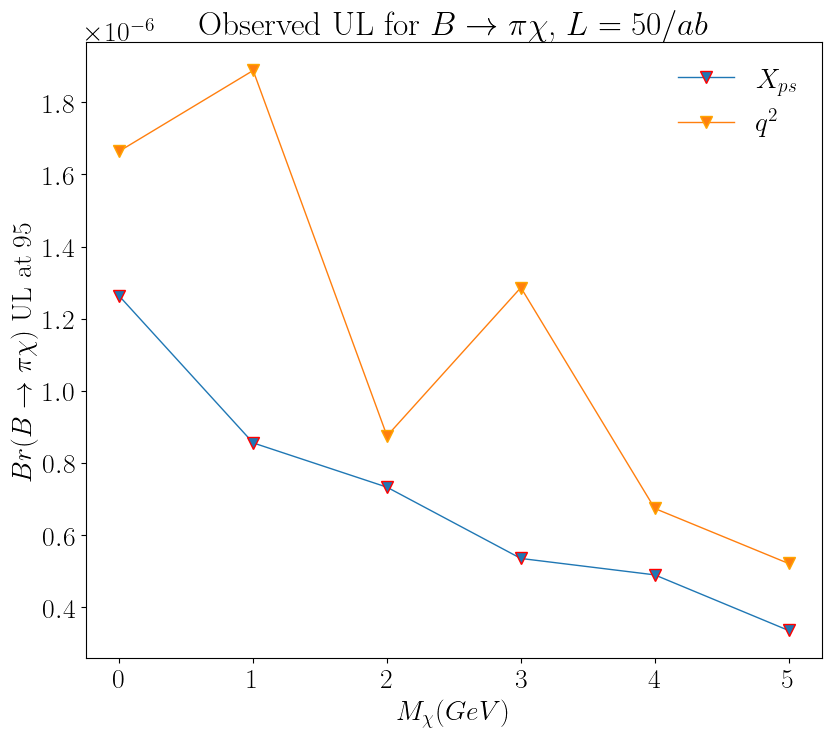

In [27]:
from matplotlib.ticker import ScalarFormatter


#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(9.5, 8))
ax = fig.add_subplot(111)


ax.plot(dataXps_50_Had_df.Mass, dataXps_50_Had_df.Limit, marker = 'v', lw=1, ms=9, mew=1, mec='r')
ax.plot(dataq2_50_Had_df.Mass, dataq2_50_Had_df.Limit, marker = 'v', lw=1, ms=9, mew=1, mec='orange')
#ax.plot(dataMmin_50_df.Mass, dataMmin_50_df.Limit, marker = 'o', c='b', ls='--', lw=1, ms=8, mew=1, mec='navy')
#ax.plot(dataMmax_50_df.Mass, dataMmax_50_df.Limit, marker = 's', c='r', ls='-', lw=1, ms=8, mew=1, mec='k')
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

plt.title(r'Observed UL for $B\to \pi \chi$'+', $L=50/ab$')
ax.legend([r'$X_{ps} $',  r'$q^2$', r'$M_{min}^2$', r'$M_{max}^2$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)

plt.show()

/tmp/ipykernel_192428/2539825619.py:30: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1.0E-5)


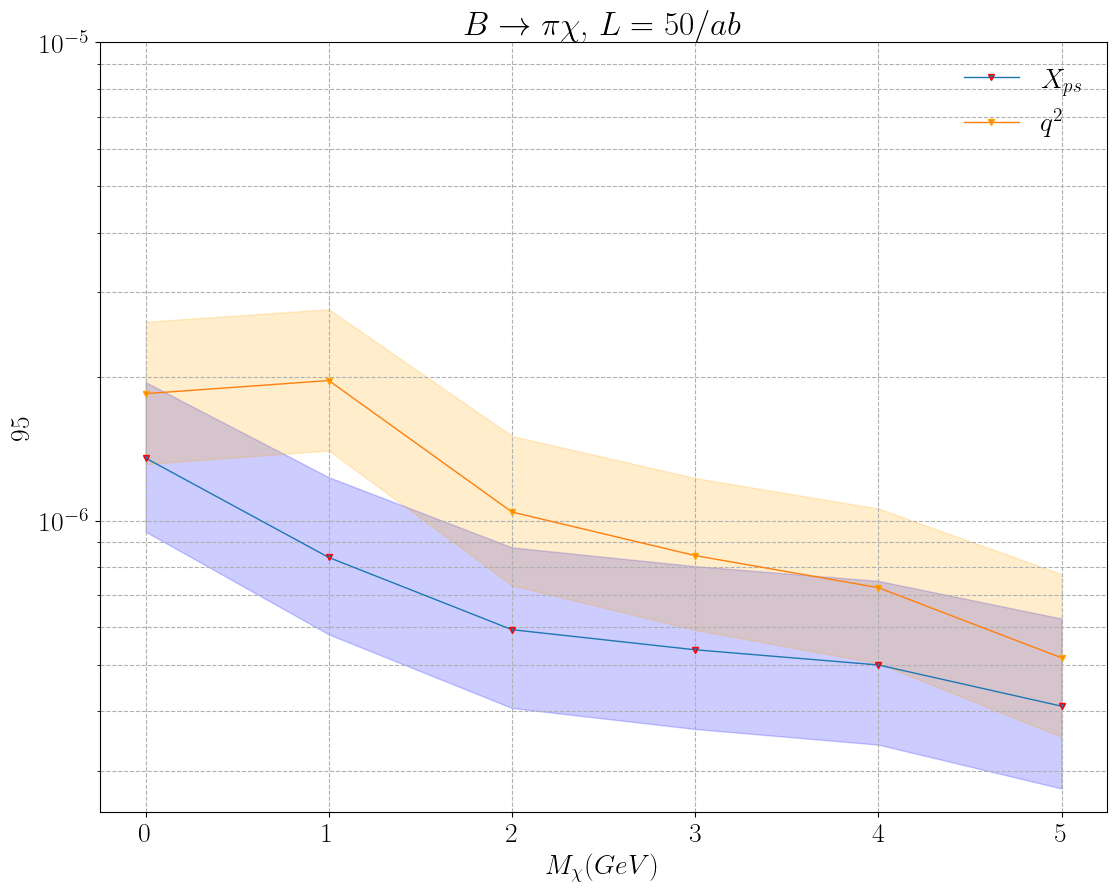

In [28]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

x = dataXps_50_Had_df.Mass

ax.plot(x, dataXps_50_Had_df.Median, marker = 'v', lw=1, ms=5, mew=1, mec='r', label = r'$X_{ps}$')
ax.fill_between(x, dataXps_50_Had_df.sigmaMinus1, dataXps_50_Had_df.sigmaPlus1, color='b',alpha=0.2)
ax.plot(x, dataq2_50_Had_df.Median, marker = 'v', lw=1, ms=5, mew=1, mec='orange', label = r'$q^2$')
ax.fill_between(x, dataq2_50_Had_df.sigmaMinus1, dataq2_50_Had_df.sigmaPlus1, color='orange', alpha=0.2)
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel('95% C.L upper limit')

x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)
ax.set_yscale('log')
plt.ylim(0, 1.0E-5)

plt.title(r'$B\to \pi \chi$'+', $L=50/ab$')
#ax.legend([r'$M_{min}$', r'$M_{max}$', '2D'], frameon=False);
ax.legend(frameon = False)
#plt.savefig('UpperLimitsLumi_62_8_bands.png', dpi=300, bbox_inches = 'tight')

plt.show()

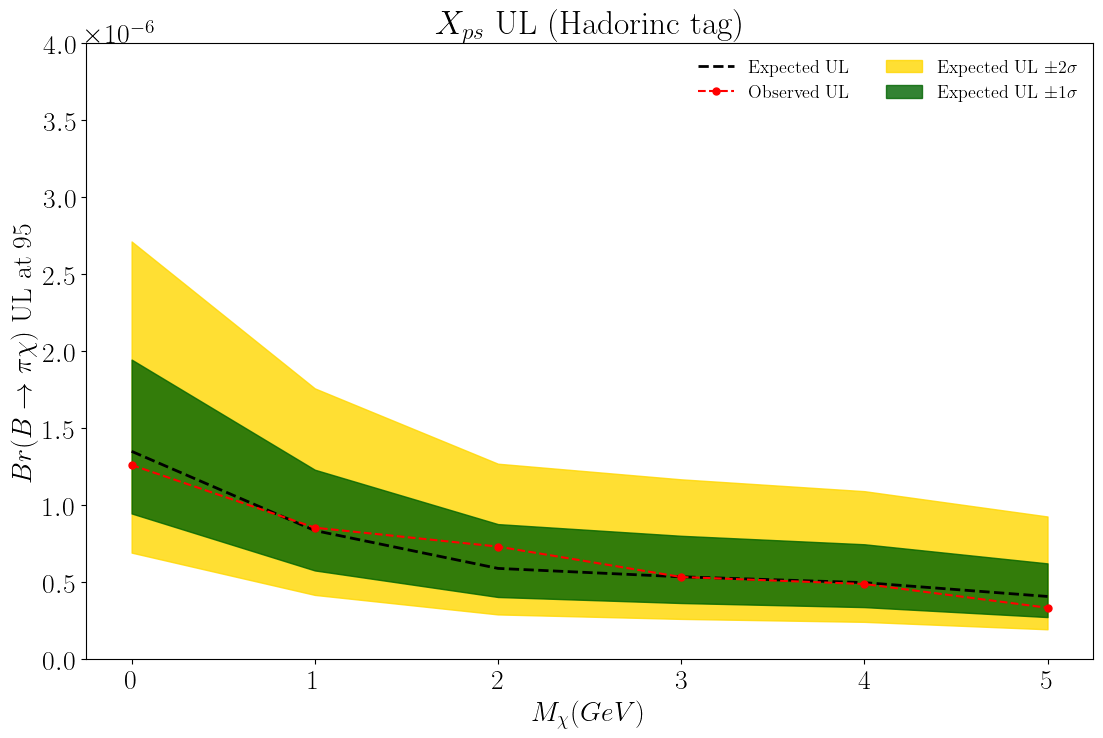

In [29]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataXps_50_Had_df.Mass

ax.plot(x, dataXps_50_Had_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataXps_50_Had_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataXps_50_Had_df.sigmaMinus2, dataXps_50_Had_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataXps_50_Had_df.sigmaMinus1, dataXps_50_Had_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 4E-6)

plt.title(r'$X_{ps}$ UL (Hadorinc tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

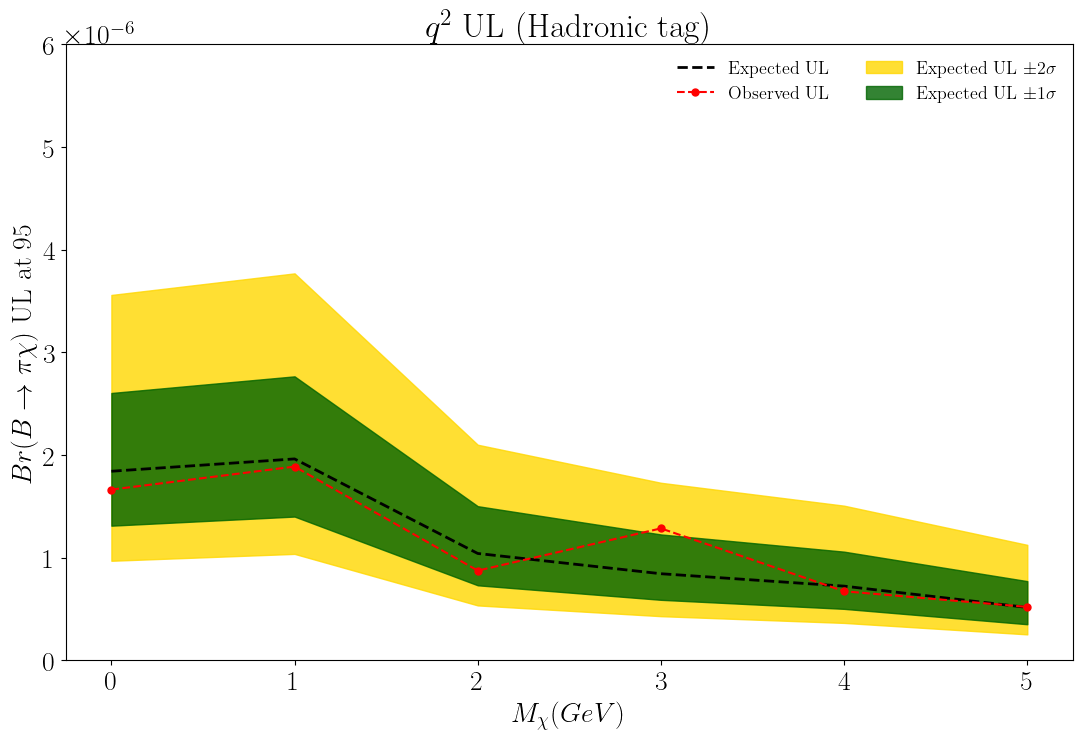

In [30]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataq2_50_Had_df.Mass

ax.plot(x, dataq2_50_Had_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataq2_50_Had_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataq2_50_Had_df.sigmaMinus2, dataq2_50_Had_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataq2_50_Had_df.sigmaMinus1, dataq2_50_Had_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 6E-6)

plt.title(r'$q^2$ UL (Hadronic tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

### ULs using 362/fb 

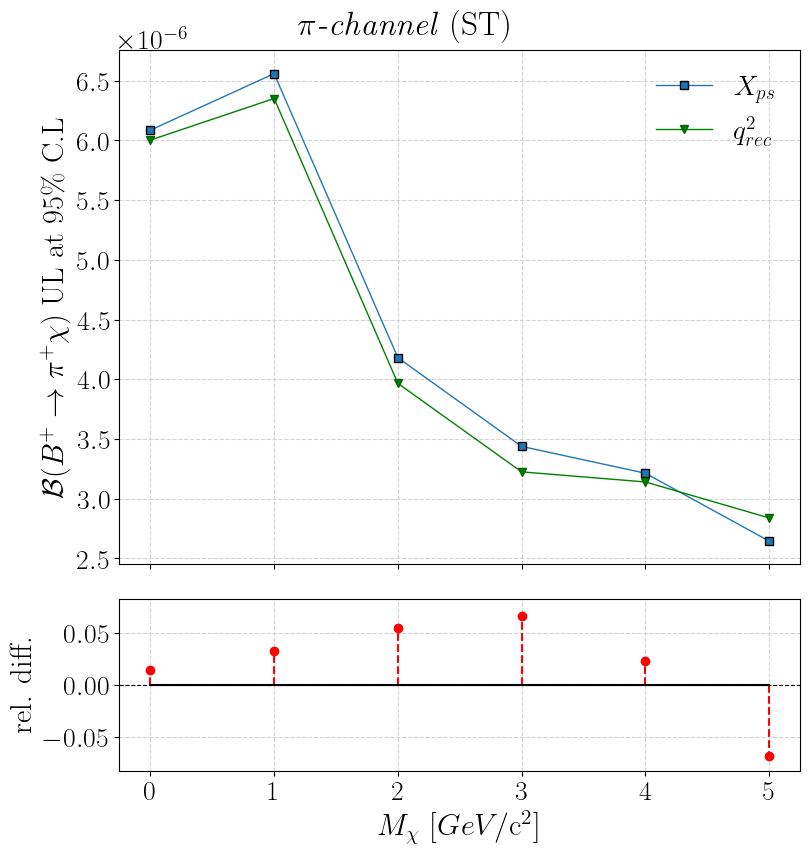

In [31]:
from matplotlib.ticker import ScalarFormatter



#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_362_df.Mass  # X-axis values

# Calculate the difference between the two sets
#difference = (dataXps_362_df.Median - dataq2_362_df.Median)
difference = (dataXps_362_df.Median - dataq2_362_df.Median)/(dataq2_362_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
#fig.subplots_adjust(hspace=0.02)
fig.suptitle(r'$\pi$\textit{-channel} (ST)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_362_df.Mass, dataXps_362_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataq2_362_df.Mass, dataq2_362_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')



ax1.yaxis.set_major_formatter(formatter)


ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to \pi^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=362/ab$)')
ax1.legend([r'$X_{ps} $',  r'$q^2_{rec}$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataXps_362_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.', fontsize=22)
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.2  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
plt.savefig(f'../GetLimit/ULPlots/Pi_SemilepUL362.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [32]:
difference

0    0.013847
1    0.032782
2    0.054195
3    0.066150
4    0.023289
5   -0.068230
Name: Median, dtype: float64

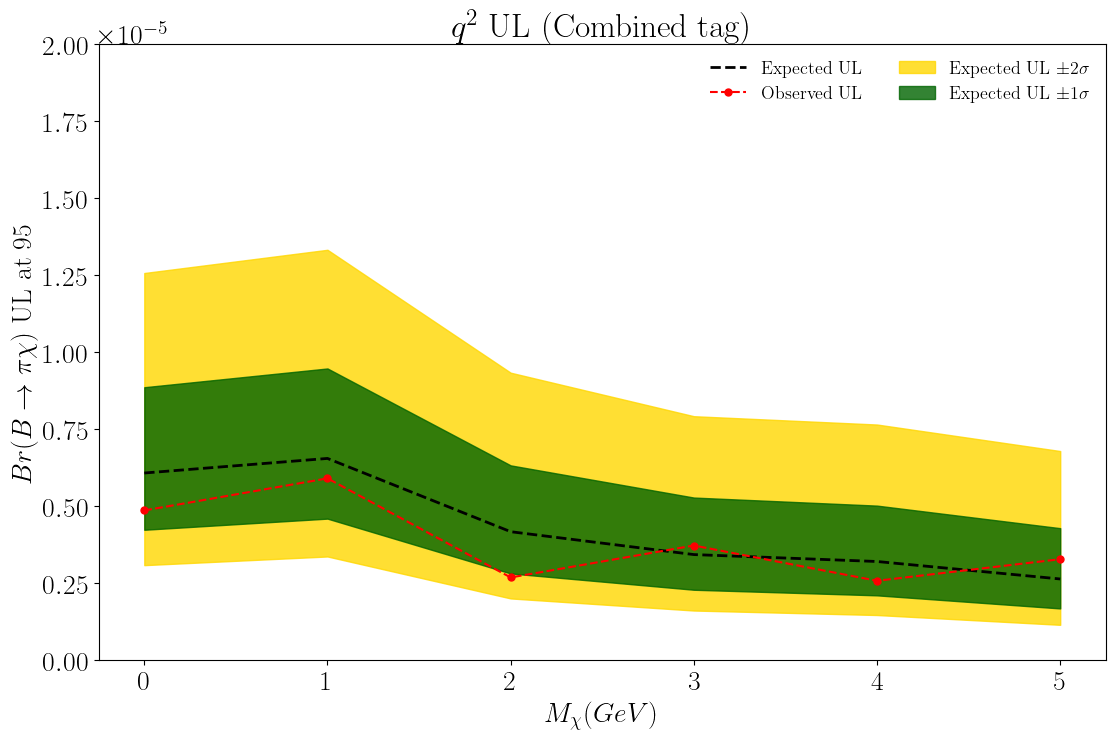

In [33]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataXps_362_df.Mass

ax.plot(x, dataXps_362_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataXps_362_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataXps_362_df.sigmaMinus2, dataXps_362_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataXps_362_df.sigmaMinus1, dataXps_362_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 2E-5)

plt.title(r'$q^2$ UL (Combined tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

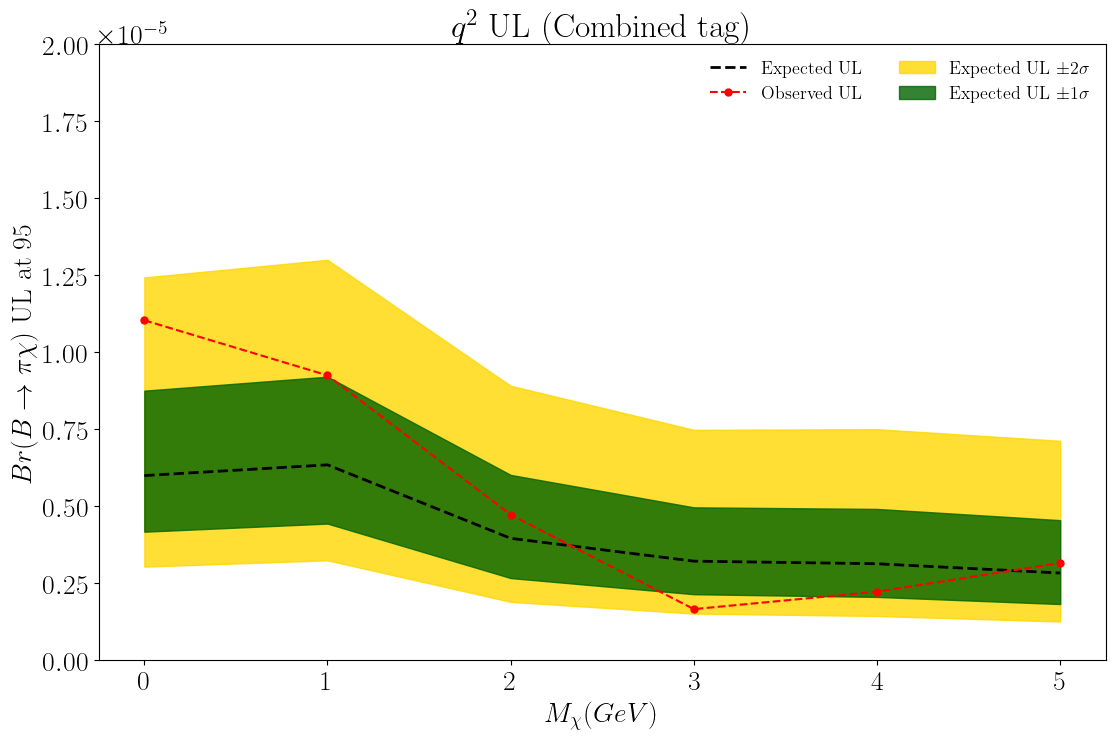

In [34]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


#plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = dataq2_362_df.Mass

ax.plot(x, dataq2_362_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, dataq2_362_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, dataq2_362_df.sigmaMinus2, dataq2_362_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, dataq2_362_df.sigmaMinus1, dataq2_362_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 2E-5)

plt.title(r'$q^2$ UL (Combined tag)')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

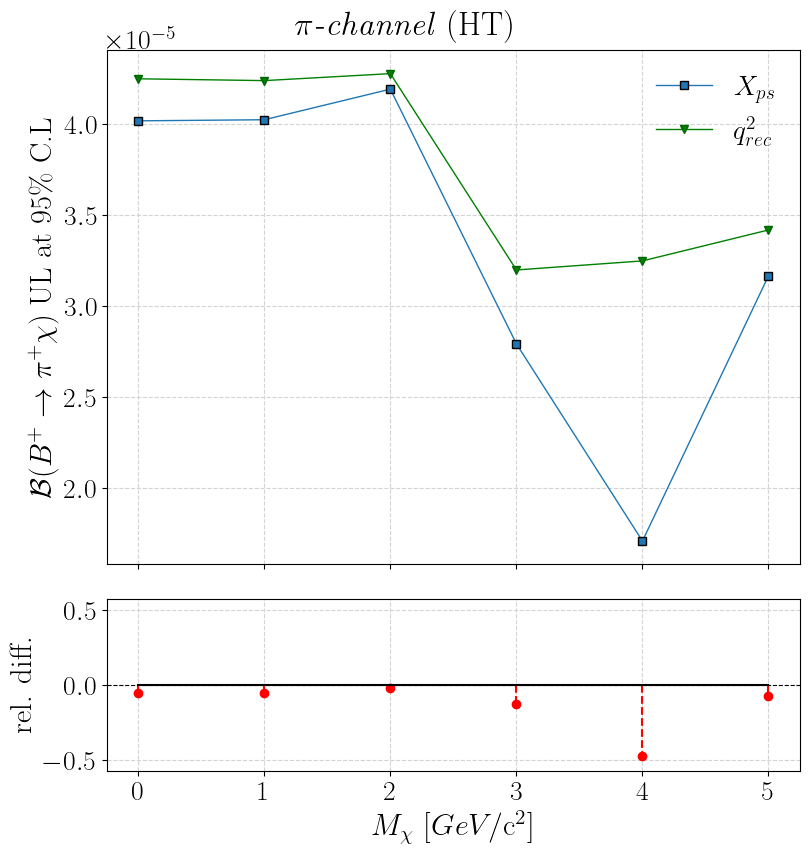

In [35]:
from matplotlib.ticker import ScalarFormatter



#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_362_Had_NoRed_df.Mass  # X-axis values

# Calculate the difference between the two sets
#difference = (dataXps_362_Had_NoRed_df.Median - dataq2_362_Had_NoRed_df.Median)
difference = (dataXps_362_Had_NoRed_df.Median - dataq2_362_Had_NoRed_df.Median)/(dataq2_362_Had_NoRed_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
#fig.subplots_adjust(hspace=0.02)
fig.suptitle(r'$\pi$\textit{-channel} (HT)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_362_Had_NoRed_df.Mass, dataXps_362_Had_NoRed_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataq2_362_Had_NoRed_df.Mass, dataq2_362_Had_NoRed_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')



ax1.yaxis.set_major_formatter(formatter)


ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to \pi^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=362/ab$)')
ax1.legend([r'$X_{ps} $',  r'$q^2_{rec}$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataXps_362_Had_NoRed_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.', fontsize=22)
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.2  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
plt.savefig(f'../GetLimit/ULPlots/Pi_HadronicUL362.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [36]:
difference

0   -0.054407
1   -0.050740
2   -0.019951
3   -0.126985
4   -0.474131
5   -0.073827
Name: Median, dtype: float64

### UL without apply the K0 and n0 (neutrons) cuts

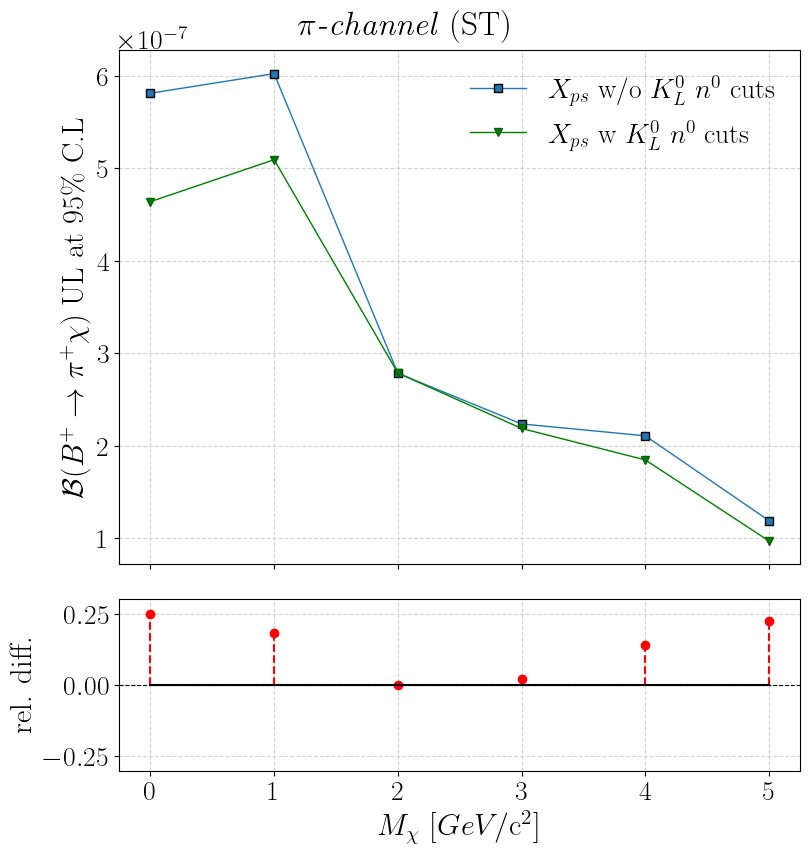

In [37]:
from matplotlib.ticker import ScalarFormatter



#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_50_NoRed_df.Mass  # X-axis values

# Calculate the difference between the two sets
#difference = (dataXps_50_NoRed_df.Median - dataXps_50_df.Median)
difference = (dataXps_50_NoRed_df.Median - dataXps_50_df.Median)/(dataXps_50_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
#fig.subplots_adjust(hspace=0.02)
fig.suptitle(r'$\pi$\textit{-channel} (ST)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_50_NoRed_df.Mass, dataXps_50_NoRed_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataXps_50_df.Mass, dataXps_50_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')



ax1.yaxis.set_major_formatter(formatter)


ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to \pi^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=362/ab$)')
ax1.legend([r'$X_{ps}$ w/o $K^0_L$ $n^0$ cuts',  r'$X_{ps}$ w $K^0_L$ $n^0$ cuts'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataXps_50_NoRed_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.', fontsize=22)
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.2  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
#plt.savefig(f'../GetLimit/ULPlots/Pi_SemilepUL362.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [38]:
difference

0    0.252841
1    0.182831
2   -0.001081
3    0.022443
4    0.141322
5    0.227190
Name: Median, dtype: float64

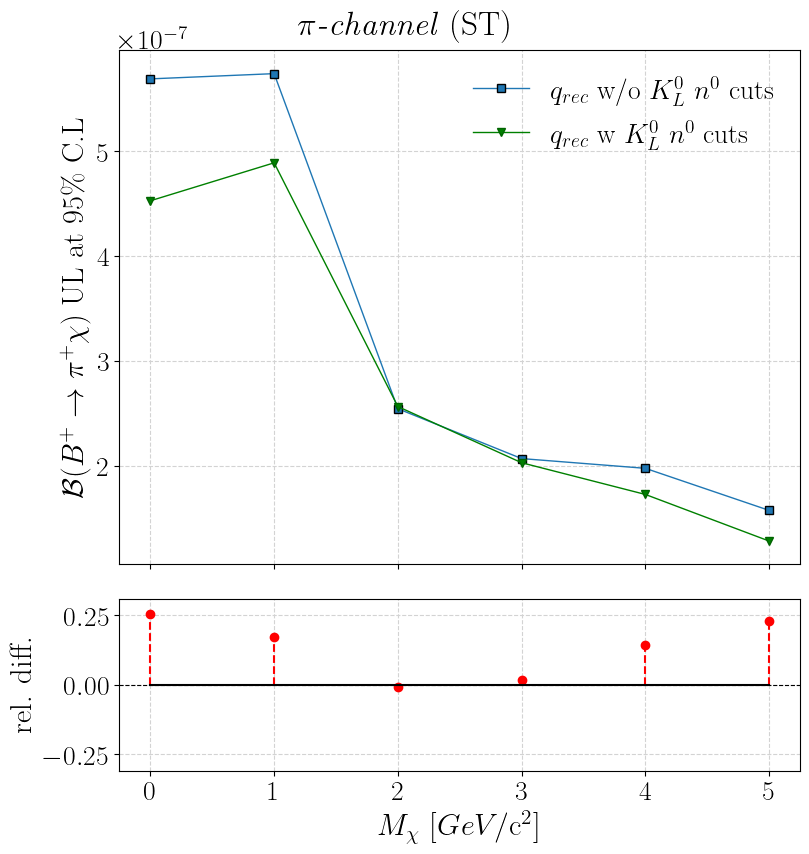

In [39]:
from matplotlib.ticker import ScalarFormatter



#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataq2_50_NoRed_df.Mass  # X-axis values

# Calculate the difference between the two sets
#difference = (dataq2_50_NoRed_df.Median - dataq2_50_df.Median)
difference = (dataq2_50_NoRed_df.Median - dataq2_50_df.Median)/(dataq2_50_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
#fig.subplots_adjust(hspace=0.02)
fig.suptitle(r'$\pi$\textit{-channel} (ST)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataq2_50_NoRed_df.Mass, dataq2_50_NoRed_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataq2_50_df.Mass, dataq2_50_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')



ax1.yaxis.set_major_formatter(formatter)


ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to \pi^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=362/ab$)')
ax1.legend([r'$q_{rec}$ w/o $K^0_L$ $n^0$ cuts',  r'$q_{rec}$ w $K^0_L$ $n^0$ cuts'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataq2_50_NoRed_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.', fontsize=22)
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.2  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
#plt.savefig(f'../GetLimit/ULPlots/Pi_SemilepUL362.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [40]:
difference

0    0.257015
1    0.174117
2   -0.008015
3    0.019575
4    0.144644
5    0.228752
Name: Median, dtype: float64

### Hadronic tags for 362/fb

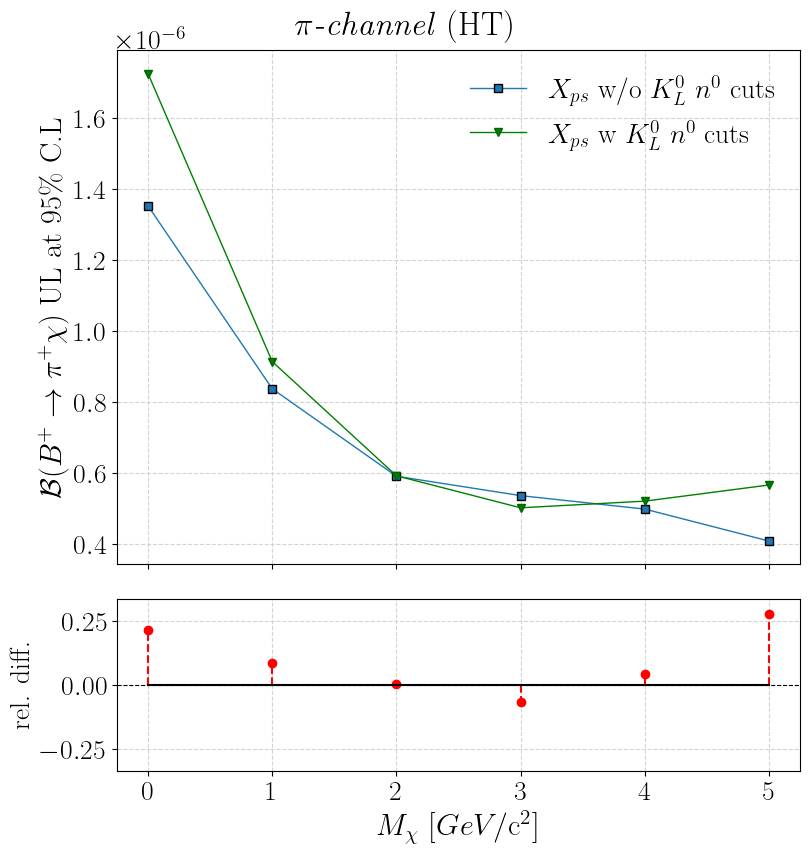

In [41]:
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_50_Had_df.Mass  # X-axis values

# Calculate the difference between the two sets
#differenceHad = (dataXps_50_NoRed_Had_df.Median - dataXps_50_Had_df.Median)
differenceHad = (dataXps_50_NoRed_Had_df.Median - dataXps_50_Had_df.Median)/(dataXps_50_NoRed_Had_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
fig.suptitle(r'$\pi$\textit{-channel}  (HT)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_50_Had_df.Mass, dataXps_50_Had_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataXps_50_NoRed_Had_df.Mass, dataXps_50_NoRed_Had_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')




ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to \pi^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=50/ab$)')
ax1.legend([r'$X_{ps}$ w/o $K^0_L$ $n^0$ cuts',  r'$X_{ps}$ w $K^0_L$ $n^0$ cuts'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataXps_50_Had_df.Mass, differenceHad, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(differenceHad)), abs(max(differenceHad))) * 1.2  # Set y-limits based on the maximum absolute difference
#ax2.set_ylim(-0.3, pull_plot_ylim)
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
#plt.savefig(f'../GetLimit/ULPlots/Pi_HadronicUL.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [42]:
differenceHad

0    0.215784
1    0.083667
2    0.002182
3   -0.068135
4    0.042820
5    0.277955
Name: Median, dtype: float64

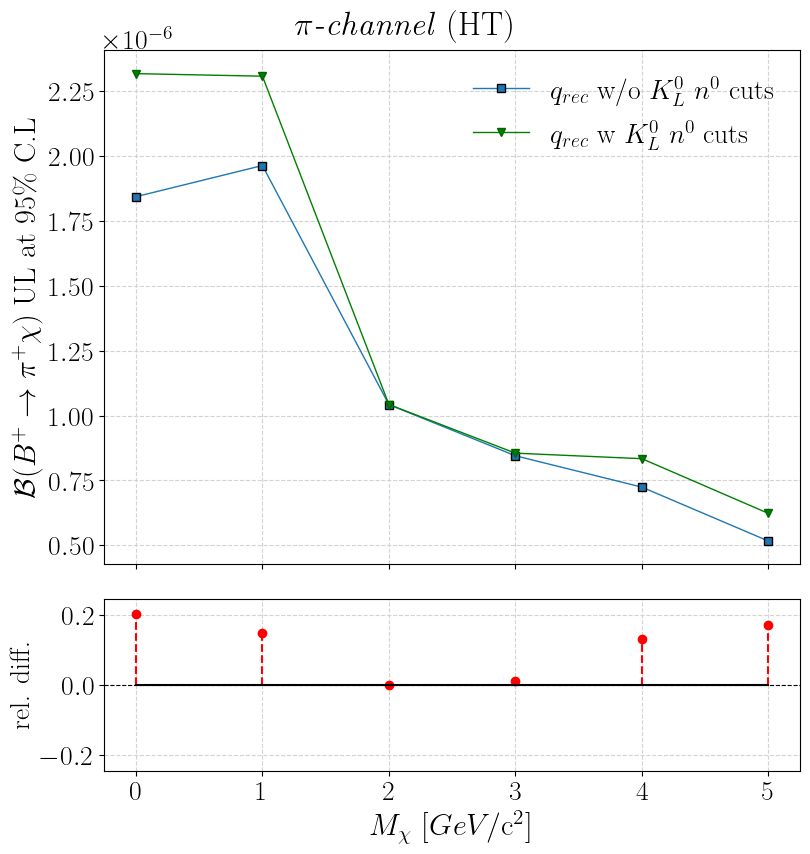

In [43]:
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataq2_50_Had_df.Mass  # X-axis values

# Calculate the difference between the two sets
#differenceHad = (dataq2_50_NoRed_Had_df.Median - dataq2_50_Had_df.Median)
differenceHad = (dataq2_50_NoRed_Had_df.Median - dataq2_50_Had_df.Median)/(dataq2_50_NoRed_Had_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
fig.suptitle(r'$\pi$\textit{-channel}  (HT)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataq2_50_Had_df.Mass, dataq2_50_Had_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataq2_50_NoRed_Had_df.Mass, dataq2_50_NoRed_Had_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')




ax1.yaxis.set_major_formatter(formatter)
ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to \pi^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=50/ab$)')
ax1.legend([r'$q_{rec}$ w/o $K^0_L$ $n^0$ cuts',  r'$q_{rec}$ w $K^0_L$ $n^0$ cuts'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataq2_50_Had_df.Mass, differenceHad, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.')
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(differenceHad)), abs(max(differenceHad))) * 1.2  # Set y-limits based on the maximum absolute difference
#ax2.set_ylim(-0.3, pull_plot_ylim)
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
#plt.savefig(f'../GetLimit/ULPlots/Pi_HadronicUL.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [44]:
differenceHad

0    0.204620
1    0.149176
2    0.000201
3    0.011754
4    0.131468
5    0.170921
Name: Median, dtype: float64

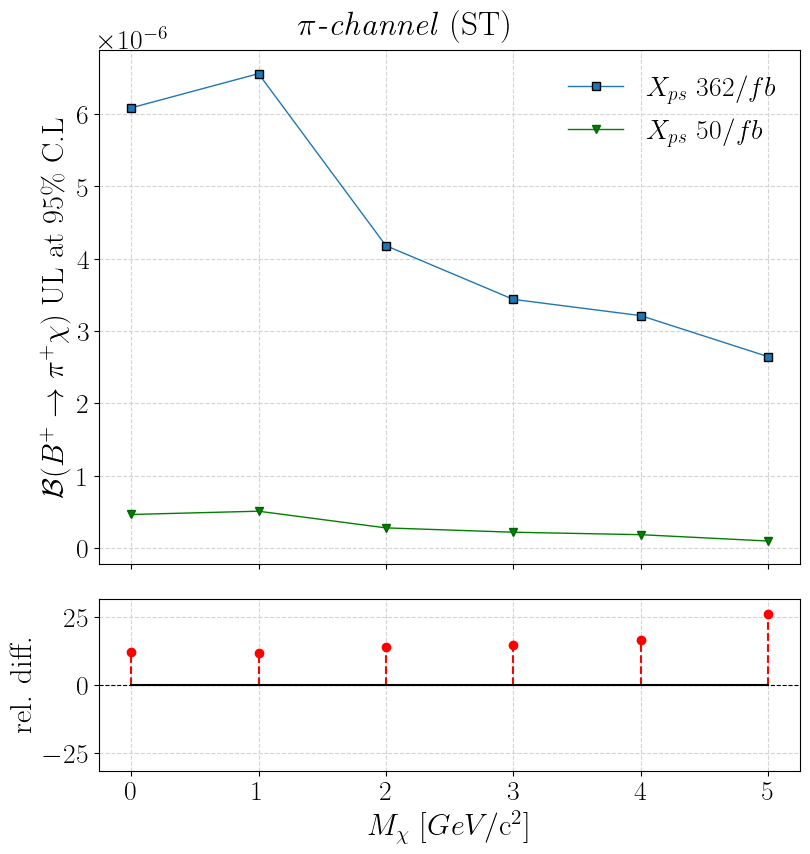

In [45]:
from matplotlib.ticker import ScalarFormatter



#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

# Generate sample data
x = dataXps_362_df.Mass  # X-axis values

# Calculate the difference between the two sets
#difference = (dataXps_362_df.Median - dataXps_50_df.Median)
difference = (dataXps_362_df.Median - dataXps_50_df.Median)/(dataXps_50_df.Median)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8.5, 9.5))
#fig.subplots_adjust(hspace=0.02)
fig.suptitle(r'$\pi$\textit{-channel} (ST)',  y=0.9)

# Plot the first set of data points
ax1.plot(dataXps_362_df.Mass, dataXps_362_df.Median, marker='s',lw=1, ms=6, mew=1, mec='k')

# Plot the second set of data points
ax1.plot(dataXps_50_df.Mass, dataXps_50_df.Median, marker='v', lw=1, ms=6, mew=1, color='green', mec='darkgreen')



ax1.yaxis.set_major_formatter(formatter)


ax1.grid(True, which="both", ls='--', color='lightgray')



# Set labels and legend for the first subplot
ax1.set_ylabel(r'$\mathcal{B}(B^{+}\to \pi^{+}\chi)$ UL at 95\% C.L', fontsize=22)

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax1.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

# Title and legends in the first subplot
#plt.title(r'Semileptonic tag ($L=362/ab$)')
ax1.legend([r'$X_{ps}$  $362/fb$',  r'$X_{ps}$ $50/fb$'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)



# Plot the pull plot (difference between the two sets)
ax2.stem(dataXps_362_df.Mass, difference, basefmt='k-', linefmt='r--', markerfmt='ro')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at y=0

# Set labels and legend for the second subplot
ax2.set_xlabel(r'$M_{\chi}$ $[GeV/\mathrm{c}^2]$', fontsize=22)
ax2.set_ylabel('rel. diff.', fontsize=22)
ax2.grid(True, which="both", ls='--', color='lightgray')
#ax2.legend()

# Adjust y-limits for the pull plot
pull_plot_ylim = max(abs(min(difference)), abs(max(difference))) * 1.2  # Set y-limits based on the maximum absolute difference
ax2.set_ylim(-pull_plot_ylim, pull_plot_ylim)
#ax2.set_ylim(-1e-8, 3e-8)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, -0.01, 1, 0.98])
#plt.tight_layout(pad=1.5)
#plt.savefig(f'../GetLimit/ULPlots/Pi_SemilepUL362.png', dpi=300,  bbox_inches = 'tight')
plt.show()

In [46]:
difference

0    12.120829
1    11.881125
2    14.010753
3    14.732072
4    16.415918
5    26.332561
Name: Median, dtype: float64

## Considering Gaussian limits for $\mu$ 

### Now, the idea is calculate the UL at 95\% C.L.

In [47]:
# Expected ULs in Branching ratio (Br as POI) of events Using b-only model to 50/ab 
Gaus_UL_Xps_50 = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'mu': [1.6747e-07, 2.45396e-07, 2.53246e-07, 1.86597e-07, 1.18661e-07, 5.82383e-08],
        'sigma': [6.01314e-07, 8.84236e-07, 9.09099e-07, 6.83504e-07, 4.34087e-07, 1.48652e-07] }

'''Br_sMMax2_50_sig = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [1.18804E-07, 2.1924E-07, 2.36268E-07, 1.79754E-07, 1.13551E-07, 2.95065E-08],
        'sigmaPlus2': [4.76181E-07, 7.94885E-07, 8.48117E-07, 6.48339E-07, 4.1452E-07, 1.2878E-07],
        'sigmaMinus1': [1.61249E-07, 2.94357E-07, 3.17763E-07, 2.39997E-07, 1.51895E-07, 3.9674E-08],
        'sigmaPlus1': [3.38033E-07, 5.82327E-07, 6.24294E-07, 4.75659E-07, 3.01526E-07, 8.68019E-08],
        'Median': [2.33375E-07, 4.11794E-07, 4.43451E-07, 3.36707E-07, 2.10845E-07, 5.77132E-08],
        'Limit': [2.67746E-07, 1.87125E-07, 3.43485E-07, 4.2663E-07, 1.36296E-07, 7.75692E-08]}
# Using 2D histograms with nbins=15x15
Br_s2D_50_sig = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],
        'sigmaMinus2': [1.38682E-07, 2.22079E-07, 2.59862E-07, 1.94362E-07, 1.11608E-07, 3.42156E-08],
        'sigmaPlus2': [5.31045E-07, 8.02816E-07, 9.45127E-07, 7.08495E-07, 4.19608E-07, 1.96948E-07],
        'sigmaMinus1': [1.88913E-07, 3.00023E-07, 3.51317E-07, 2.61847E-07, 1.51465E-07, 5.01589E-08],
        'sigmaPlus1': [3.82638E-07, 5.90672E-07, 6.94224E-07, 5.19316E-07, 3.04399E-07, 1.27117E-07],
        'Median': [2.67407E-07, 4.19775E-07, 4.92342E-07, 3.67657E-07, 2.1376E-07, 7.88591E-08],
        'Limit': [1.3475E-07, 3.28993E-07, 6.7131E-07, 5.30397E-07, 3.12304e-07, 8.34645E-08] }'''

"Br_sMMax2_50_sig = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],\n        'sigmaMinus2': [1.18804E-07, 2.1924E-07, 2.36268E-07, 1.79754E-07, 1.13551E-07, 2.95065E-08],\n        'sigmaPlus2': [4.76181E-07, 7.94885E-07, 8.48117E-07, 6.48339E-07, 4.1452E-07, 1.2878E-07],\n        'sigmaMinus1': [1.61249E-07, 2.94357E-07, 3.17763E-07, 2.39997E-07, 1.51895E-07, 3.9674E-08],\n        'sigmaPlus1': [3.38033E-07, 5.82327E-07, 6.24294E-07, 4.75659E-07, 3.01526E-07, 8.68019E-08],\n        'Median': [2.33375E-07, 4.11794E-07, 4.43451E-07, 3.36707E-07, 2.10845E-07, 5.77132E-08],\n        'Limit': [2.67746E-07, 1.87125E-07, 3.43485E-07, 4.2663E-07, 1.36296E-07, 7.75692E-08]}\n# Using 2D histograms with nbins=15x15\nBr_s2D_50_sig = {'Mass': [0, 1.0, 2.0, 3.0, 4.0, 5.0],\n        'sigmaMinus2': [1.38682E-07, 2.22079E-07, 2.59862E-07, 1.94362E-07, 1.11608E-07, 3.42156E-08],\n        'sigmaPlus2': [5.31045E-07, 8.02816E-07, 9.45127E-07, 7.08495E-07, 4.19608E-07, 1.96948E-07],\n        'sigmaMinus1': [1.88913

In [48]:
Br_sMMin2_50_sig_df = pd.DataFrame(Br_sMMin2_50_sig)

NameError: name 'Br_sMMin2_50_sig' is not defined

NameError: name 'NevMMin2_50_df' is not defined

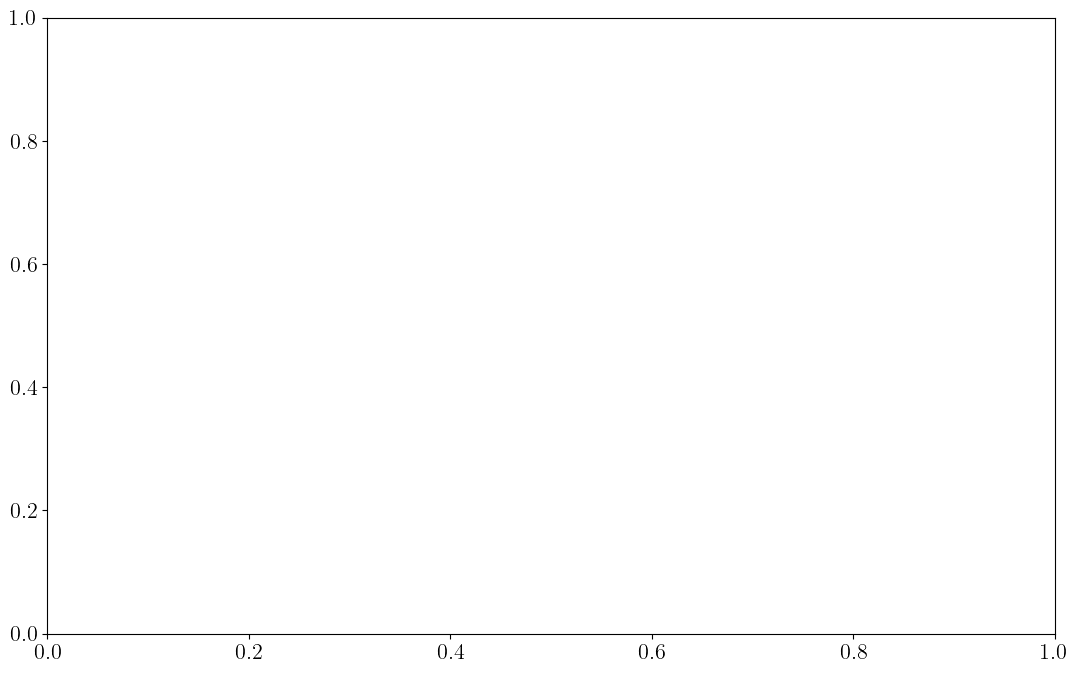

In [ ]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = NevMMin2_50_df.Mass

ax.plot(x, Br_sMMin2_50_sig_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, Br_sMMin2_50_sig_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, Br_sMMin2_50_sig_df.sigmaMinus2, Br_sMMin2_50_sig_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, Br_sMMin2_50_sig_df.sigmaMinus1, Br_sMMin2_50_sig_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ at 95% CL')

#x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(0, 7E-3)

plt.title(r'$M_{min}$ UL')
ax.legend(frameon = False, fontsize =13, ncol=2)
#plt.title(r'$B\to \pi\chi$'+', $L=50/ab$')
#plt.savefig('UpperLimitsLumi628_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

In [ ]:
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(9.5, 8))
ax = fig.add_subplot(111)


ax.plot(Br_sMMin2_50_sig_df.Mass, Br_sMMin2_50_sig_df.Median, marker = 'v', lw=1, ms=9, mew=1, mec='g')
#ax.plot(Br_sMMin2_50_sig_df.Mass, Br_sMMin2_50_sig_df.Median, marker = 'v', lw=1, ms=9, mew=1, mec='orange')
#ax.plot(Br_sMMin2_50_sig_df.Mass, Br_sMMin2_50_sig_df.Median, marker = 'o', c='b', ls='--', lw=1, ms=8, mew=1, mec='navy')
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

plt.title(r'Expected UL for $B\to \pi \chi$'+', $L=50/ab$')
ax.legend([r'$M_{min}$', r'$M_{max}$', '2D'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)

plt.show()

In [ ]:
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(9.5, 8))
ax = fig.add_subplot(111)


ax.plot(Br_sMMin2_50_sig_df.Mass, Br_sMMin2_50_sig_df.Limit, marker = 'v', lw=1, ms=9, mew=1, mec='g')
#ax.plot(Br_sMMax2_50_df.Mass, Br_sMMax2_50_df.Limit, marker = 'v', lw=1, ms=9, mew=1, mec='orange')
#ax.plot(Br_s2D_50_df.Mass, Br_s2D_50_df.Limit, marker = 'o', c='b', ls='--', lw=1, ms=8, mew=1, mec='navy')
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\chi}(GeV)$')
ax.set_ylabel(r'$Br(B\to \pi\chi)$ UL at 95% C.L')

x = [0, 1.0, 2.0, 3.0, 4.0, 5.0]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

#plt.ylim(10E-6, 10E-3)

plt.title(r'Observed UL for $B\to \pi \chi$'+', $L=50/ab$')
ax.legend([r'$M_{min}$', r'$M_{max}$', '2D'], frameon=False);
#plt.savefig('UpperLimitsLumi.png', dpi=300)

plt.show()

##### data2D_df.Mass

In [ ]:
data2D_df.median

In [ ]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

x = dataMMin2_df.Mass

#ax.plot(x, dataMMin2_df.Median, marker = 'v', lw=1, ms=5, mew=1, mec='g', label = r'$M_{min}$')
ax.plot(x, dataMMin2_df.Limit, marker = 'v', c='g', lw=1, ms=5, mew=1, mec='g', label = r'$M_{min}$ CLs UL')
ax.plot(x, dataMMin2Gauss95CL_df.GaussianLimit, marker = 'v', c='darkgreen', ls='--', lw=1.5, ms=7, mew=1, mec='darkcyan', label = 'Gaussian UL at 95%')
#ax.fill_between(x, dataMMin2_df.sigmaMinus1, dataMMin2_df.sigmaPlus1, color='g', alpha=0.2)
#ax.plot(x, dataMMax2_df.Median, marker = 'v', lw=1, ms=5, mew=1, mec='orange', label = r'$M_{max}$')
ax.plot(x, dataMMax2_df.Limit, marker = 'v', c='orange', lw=1, ms=5, mew=1, mec='orange', label = r'$M_{max}$ CLs UL')
ax.plot(x, dataMMax2Gauss95CL_df.GaussianLimit, marker = 'v', c='darkorange', ls='--', lw=1.5, ms=7, mew=1, mec='orange', label = 'Gaussian UL at 95%')
#ax.fill_between(x, dataMMax2_df.sigmaMinus1, dataMMax2_df.sigmaPlus1, color='orange', alpha=0.2)
#ax.plot(x, data2D_df.Median, marker = 'o', c='b', ls='-', lw=1, ms=5, mew=1, mec='navy', label = '2D')
ax.plot(x, data2D_df.Limit, marker = 'o', c='b', ls='-', lw=1, ms=5, mew=1, mec='navy', label = '2D CLs UL')
ax.plot(x, data2DGauss95CL_df.GaussianLimit, marker = 'o', c='darkblue', ls='--', lw=1.5, ms=7, mew=1, mec='blue', label = 'Gaussian UL at 95%')
#ax.fill_between(x, data2D_df.sigmaMinus1, data2D_df.sigmaPlus1, color='navy', alpha=0.2)
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\alpha}(GeV)$')
ax.set_ylabel('95% C.L upper limit')

x = [0.0, 0.5, 0.7, 1.0, 1.2, 1.4, 1.6]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)
ax.set_yscale('log')
plt.ylim(0, 1.0E-1)

plt.title(r'$\tau\to \mu \alpha$'+', $L=62.8/fb$')
#ax.legend([r'$M_{min}$', r'$M_{max}$', '2D'], frameon=False);
ax.legend(frameon = False)
plt.savefig('UpperLimitsLumi_62_8_bands_Gauss.png', dpi=300, bbox_inches = 'tight')

plt.show()

In [ ]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = data2D_df.Mass

ax.plot(x, data2D_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, data2D_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.plot(x, data2DGauss95CL_df.GaussianLimit, marker = '^', c='magenta', ls='-', lw=1.5, ms=7, mew=1, mec='darkcyan', label = 'Gaussian UL at 95%')
ax.fill_between(x, data2D_df.sigmaMinus2, data2D_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, data2D_df.sigmaMinus1, data2D_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\alpha}(GeV)$')
ax.set_ylabel(r'$Br(\tau\to \mu\alpha)/Br(\tau\to \mu\nu\nu)$ at 95% CL')

x = [0.0, 0.5, 0.7, 1.0, 1.2, 1.4, 1.6]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 0.3E-3)

#plt.title("Crop Yields in Kanto")
#ax.legend([r'$M_{min}$', r'$M_{max}$', '2D'], frameon=False);
ax.legend(frameon = False, fontsize =13, ncol=2)
plt.title(r'$\tau\to \mu \alpha$'+', $L=62.8/fb$')
plt.savefig('UpperLimitsLumi628_2Dbands_Gauss.png', dpi=300, bbox_inches = 'tight')

plt.show()

In [ ]:
# Expected ULs Using b-only model using 100/fb
# with a branching ratio Br_tau_to_pi_X = 0.1082
#dataMmin2_100 = {'Mass': [0, 0.5, 0.7, 1.0, 1.2, 1.4, 1.6],
 #       'sigmaMinus1': [0.0117136, 0.0143349, 0.0187066, 0.0129498, 0.00734451, 0.00535825, 0.00251913],
 #       'sigmaPlus1': [0.0223622, 0.0273843, 0.0356002, 0.0248184, 0.0141984, 0.0104506, 0.00493723],
 #       'Median': [0.0161646, 0.0198233, 0.0257825, 0.0178886, 0.0101868, 0.00746937, 0.00351721],
 #       'Limit': [0.0160294, 0.0196448, 0.0256449, 0.0179586, 0.0102533, 0.00753026, 0.00352749]}

#dataMMax2_100 = {'Mass': [0, 0.5, 0.7, 1.0, 1.2, 1.4, 1.6],
 #       'sigmaMinus1': [0.0096192, 0.012594, 0.0129932, 0.00736701, 0.00399915, 0.00210662, 0.00102792],
 #       'sigmaPlus1': [0.0185785, 0.0243996, 0.0252182, 0.0142485, 0.00772473, 0.00406993, 0.00199684],
 #       'Median': [0.0133166, 0.0175022, 0.0180729, 0.0102205, 0.00554621, 0.00292422, 0.00142849],
 #       'Limit': [0.013378, 0.0174603, 0.0180418, 0.0102234, 0.00555209, 0.00292733, 0.00142858]}

data2D_100 = {'Mass': [0, 0.5, 0.7, 1.0, 1.2, 1.4, 1.6],
        'sigmaMinus2': [9.89442E-06, 9.45874E-06, 8.76943E-06, 7.66661E-06, 6.57873E-06, 5.70008E-06, 1.31117e-05],
        'sigmaPlus2': [0.000118289, 0.000112418, 0.00010479, 9.19875E-05, 7.85454E-05, 6.82595E-05, 0.00015545],
        'sigmaMinus1': [1.77834E-05, 1.69104E-05, 1.57454E-05, 1.38008E-05, 1.17991E-05, 1.01991E-05, 2.3435e-05],
        'sigmaPlus1': [6.60166E-05, 6.27062E-05, 5.84667E-05, 5.13077E-05, 4.38278E-05, 3.80075E-05, 8.68348e-05],
        'Median': [3.41615E-05, 3.24464E-05, 3.0243E-05, 2.65638E-05, 2.26848E-05, 1.9647E-05, 4.49666e-05],
        'Limit': [3.54572E-05, 3.36825E-05, 3.13614E-05, 2.76945E-05, 2.37682E-05, 1.98837E-05, 4.73396e-05]    }

In [ ]:
#dataMmin2_100_df = pd.DataFrame(dataMmin2_100)
#dataMMax2_100_df = pd.DataFrame(dataMMax2_100)
data2D_100_df = pd.DataFrame(data2D_100)

#dataMmin2_100_df
#dataMMax2_100_df
data2D_100_df

In [ ]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))


plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = data2D_df.Mass

#ax.plot(x, dataMmin2_100_df.Median, marker = 'v', lw=1, ms=6, mew=1, mec='g', label = r'$M_{min}$')
#ax.fill_between(x, dataMmin2_100_df.sigmaMinus1, dataMmin2_100_df.sigmaPlus1, color='g', alpha=0.2)
#ax.plot(x, dataMMax2_100_df.Median, marker = 's', lw=1, ms=6, mew=1, mec='orange', label = r'$M_{max}$')
#ax.fill_between(x, dataMMax2_100_df.sigmaMinus1, dataMMax2_100_df.sigmaPlus1, color='orange', alpha=0.2)
ax.plot(x, data2D_df.Median, marker = 'o', c='b', ls='--', lw=1, ms=6, mew=1, mec='navy', label = '2D')
ax.fill_between(x, data2D_100_df.sigmaMinus1, data2D_100_df.sigmaPlus1, color='navy', alpha=0.2)
#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\alpha}(GeV)$')
ax.set_ylabel('95% C.L upper limit')

x = [0.0, 0.5, 0.7, 1.0, 1.2, 1.4, 1.6]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)
ax.set_yscale('log')
plt.ylim(0, 1.0E-1)

plt.title(r'$\tau\to \mu \alpha$'+', $L=100/fb$')
#ax.legend([r'$M_{min}$', r'$M_{max}$', '2D'], frameon=False);
ax.legend(frameon = False)
plt.savefig('UpperLimitsLumi_100_bands.png', dpi=300, bbox_inches = 'tight')

plt.show()

In [ ]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = data2D_100_df.Mass

ax.plot(x, data2D_100_df.Median,  c='k', ls='--', lw=2.0, label = 'Expected UL')
ax.plot(x, data2D_100_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=5, mew=1, mec='red', label = 'Observed UL')
ax.fill_between(x, data2D_100_df.sigmaMinus2, data2D_100_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, data2D_100_df.sigmaMinus1, data2D_100_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\alpha}(GeV)$')
ax.set_ylabel(r'$Br(\tau\to \mu\alpha)/Br(\tau\to \mu\nu\nu)$ at 95% CL')

x = [0.0, 0.5, 0.7, 1.0, 1.2, 1.4, 1.6]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)

plt.ylim(0, 2.0E-4)

#plt.title("Crop Yields in Kanto")
#ax.legend([r'$M_{min}$', r'$M_{max}$', '2D'], frameon=False);
ax.legend(frameon = False, fontsize =13, ncol=2)
plt.title(r'$\tau\to \mu \alpha$'+', $L=100/fb$')
plt.savefig('UpperLimitsLumi100_2Dbands.png', dpi=300, bbox_inches = 'tight')

plt.show()

In [ ]:
### UL reported in Belle II paper for L=62.8

dataXsp = {'Mass': [0, 0.5, 0.7, 1.0, 1.2, 1.4, 1.6],
        'sigmaMinus1': [0.0028, 0.0053, 0.0082, 0.0118, 0.0034, 0.0027, 0.0008],
        'sigmaPlus1': [0.0039, 0.007, 0.0098, 0.0126, 0.0034, 0.0023, 0.0007],
        'Median': [0.0034, 0.0062, 0.0090, 0.0122, 0.0036, 0.0025, 0.0007],
        'Limit': [0.0034, 0.0062, 0.0090, 0.0122, 0.0036, 0.0025, 0.0007]    }


dataXsp_df = pd.DataFrame(dataXsp)

dataXsp_df

In [ ]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = data2D_df.Mass

ax.plot(x, data2D_df.Median,  c='k', ls='--', lw=2.5, label = 'Expected UL')
ax.plot(x, data2D_df.Limit, marker = 'o', c='r', ls='--', lw=1.5, ms=8, mew=1, mec='red', label = 'Observed UL')
ax.plot(x, dataXsp_df.Limit, marker = 'o', c='b', ls='--', lw=2.5, ms=8, mew=1, mec='blue', label = 'Belle II UL')
ax.fill_between(x, data2D_df.sigmaMinus2, data2D_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, data2D_df.sigmaMinus1, data2D_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\alpha}(GeV)$')
ax.set_ylabel(r'$Br(\tau\to \mu\alpha)/Br(\tau\to \mu\nu\nu)$ at 95% CL')

x = [0.0, 0.5, 0.7, 1.0, 1.2, 1.4, 1.6]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)
ax.set_yscale('log')


plt.ylim(0, 1.0E-1)

#plt.title("Crop Yields in Kanto")
#ax.legend([r'$M_{min}$', r'$M_{max}$', '2D'], frameon=False);
ax.legend(frameon = False, fontsize =13, ncol=2)
plt.title(r'$\tau\to \mu \alpha$'+', $L=62.8/fb$')
plt.savefig('UpperLimitsLumi_62_8_belle.png', dpi=300, bbox_inches = 'tight')

plt.show()

In [ ]:

#formatter = ScalarFormatter()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))


plt.rcParams.update({"font.size": 16, "font.family": "serif"})
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

x = data2D_df.Mass

ax.plot(x, data2D_df.Median,  c='k', ls='--', lw=1.5, label = 'Expected UL')
ax.plot(x, data2D_df.Limit, marker = 'o', c='r', ls='--', lw=0.5, ms=6, mew=1, mec='red', label = 'Observed UL')
ax.plot(x, dataMMin2_df.Limit,  marker = 'v', lw=1, ms=6, mew=1, mec='g', label = r'$M_{min}$')
ax.plot(x, dataMMax2_df.Limit, marker = 's', lw=1, ms=6, mew=1, mec='orange', label = r'$M_{max}$')
ax.plot(x, dataXsp_df.Limit, marker = 'o', c='b', ls='--', lw=1, ms=6, mew=1, mec='blue', label = 'Belle II UL')
ax.fill_between(x, data2D_df.sigmaMinus2, data2D_df.sigmaPlus2, color='gold', alpha=0.8, label = r'Expected UL $\pm2\sigma$')
ax.fill_between(x, data2D_df.sigmaMinus1, data2D_df.sigmaPlus1, color='darkgreen', alpha=0.8, label = 'Expected UL $\pm1\sigma$')



#ax.ticklabel_format(axis='both', style='sci', scilimits=(0,1))
ax.yaxis.set_major_formatter(formatter)
#ax.grid(True, which="both", ls='--')

#ax.set_major_formatter(OOMFormatter(-4, "%1.1f"))

ax.set_xlabel(r'$M_{\alpha}(GeV)$')
ax.set_ylabel(r'$Br(\tau\to \mu\alpha)/Br(\tau\to \mu\nu\nu)$ at 95% CL')

x = [0.0, 0.5, 0.7, 1.0, 1.2, 1.4, 1.6]
default_x_ticks = range(len(x))
ax.set_xticks(ticks=x)
ax.set_yscale('log')
plt.ylim(0, 1.25E-1)

#plt.title("Crop Yields in Kanto")
#ax.legend([r'$M_{min}$', r'$M_{max}$', '2D'], frameon=False);
ax.legend(frameon = False, fontsize =13, ncol=2)
plt.title(r'$\tau\to \mu \alpha$'+', $L=62.8/fb$')
plt.savefig('UpperLimitsLumi_62_8_comparision.png', dpi=300, bbox_inches = 'tight')

plt.show()